##### $Name:\,\color{blue}{Bin\,Lu,\,Maymoonah\,Bashir,\,Christopher\,J.\,Watson}$
##### $School:\,\color{blue}{Marcos\,School\,of\,Engineering,\,University\,of\,San\,Diego}$
##### $Class:\,\color{blue}{AAI\,500-\,Probability\,\&\,Stats\,for\,AI}$
##### $Assignment:\,\color{blue}{MSAAI\,Final Project}$
##### $Date:\,\color{blue}{10/23/2022}$

### 1. Data Preprocessing

Statement - One of the single biggest problems with our dataset was the data itself. There were many unreadable characters as well as data fields which had been incorrectly input or difficult to work with. We created a program to mitigate these issues. 
$\newline$
1) The special characters were simply deleted. This made a few of the make fields empty so model was copied into them to ensure they weren't completely blank.
$\newline$
2) Each field had special considerations, so for each field we made a small preprocessing functions and added them to a dictionary so that it would get used on the correct column.

In [1]:
# Imports
import data_fix as dfix
import data_utils_g1 as du
import matplotlib.pyplot as plt
import numpy
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
# Setting up warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# scrub the datafile
dfix.init()
# This function will automatically prompt for a file and a save location using a dialog selector
data = dfix.scrub_txt_file()

Replacing all special characters for clean read
Asking for cleaned data file save location
Printing save location:
C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/sanitized_1.txt
C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/sanitized_1_final.csv


In [3]:
# display the data
display(data.head(15))

,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Turbo,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,,186005,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,Jeep,No,Petrol,3,,192000,6,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,,200000,4,Variator,Front,4-5,Right-hand drive,Black,2
3,45769185,3607,862,FORD,ESCAPE,2011,Jeep,Yes,Hybrid,2.5,,168966,4,Automatic,Front-Rear,4-5,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,,91901,4,Automatic,Front,4-5,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,SANTA FE,2016,Jeep,Yes,Diesel,2,,160931,4,Automatic,Front,4-5,Left wheel,White,4
6,45656768,1803,761,TOYOTA,PRIUS,2010,Hatchback,Yes,Hybrid,1.8,,258909,4,Automatic,Front,4-5,Left wheel,White,12
7,45816158,549,751,HYUNDAI,SONATA,2013,Sedan,Yes,Petrol,2.4,,216118,4,Automatic,Front,4-5,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,CAMRY,2014,Sedan,Yes,Hybrid,2.5,,398069,4,Automatic,Front,4-5,Left wheel,Black,12
9,45756839,26657,0,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,,128500,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12


##### For main section of cleaning code please see file data_fix.py Appendix-1

We were also give a data dictionary which we stored in case it was needed later.

In [4]:
# Given data dictionary
data_dict= {"ID": "Unique identifier/key", "Price": "Price of the car", "Levy": "Tax applied to purchase price", 
            "Manufacturer": "Name of car manufacturer", "Model": "Model of the car", 
            "Prod_year": "Year the car was produced", "Category": "Category by body type of the car", 
            "Leather_interior": "Whether or not the car has a leather interior", "Fuel_type": "Fuel type of the car", 
            "Engine_volume": "Engine size/volume of the car", "Mileage": "Total mileage on the car", 
            "Cylinders": "Number of cylinders", "Gear_box_type": "Type of gear box", "Drive_wheels": 
            "Drive wheels on the car", "Doors": "Number of doors on the car", "Wheel": "Side of the steering wheel", 
            "Color": "Exterior color of the car", "Airbags": "Number of airbags in the car"}

file_name = "..\data\data_dictionary.txt"
# we created a utility library and saved it as data_utils_g1.py
du.save_py_dict(data_dict)

Asking for dictionary save file path


'C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/data_dictionary.json'

We looked at the data just to see what unique values we were dealing with

In [5]:
# we found quickly we would need to deal with model a little differently
print('Gearbox Uniques', data.Gear_box_type.unique())
print('Cylinders Uniques', data.Cylinders.unique())
print('Manufacturer Uniques', data.Manufacturer.unique())
model = data.Model.unique()
print('Number of Model Uniques', len(model))

Gearbox Uniques ['Automatic' 'Tiptronic' 'Variator' 'Manual']
Cylinders Uniques ['6' '4' '8' '1' '12' '3' '2' '16' '5' '7' '9' '10' '14']
Manufacturer Uniques ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO'
 'IVECO DAYLY' 'HAVAL' 'HUMMER' 'SCION' 'GONOW' 'UAZ' 'MERCURY' 'ZAZ'
 'ROVER' 'SEAT' 'LANCIA' 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB'
 'LAMBORGHINI' 'ROLLS-ROYCE' 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']
Number of Model Uniques 1481


We also tried looking and sampling the data in different ways to make sense of it.

(array([2.66069995e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.38318775e-11]),
 array([1.00000000e+00, 3.75821514e+06, 7.51642929e+06, 1.12746434e+07,
        1.50328576e+07, 1.87910717e+07, 2.25492859e+07, 2.63075000e+07]),
 [<matplotlib.patches.Polygon at 0x20d57b95490>])

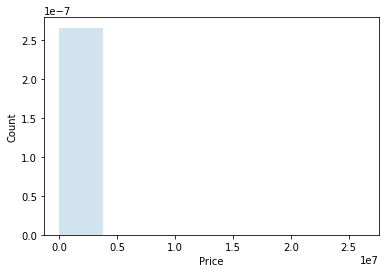

In [6]:
data_types = {}
data_types['Price'] = 'int32'
data_types['Mileage'] = 'int32'
data_types['Prod_year'] = 'int32'
data_types['Airbags'] = 'int32'
data = data.astype(data_types)
data = data.sort_values(by=['ID'])

# label the plot
plt.xlabel("Price")
plt.ylabel("Count")

# create histogram
plt.hist(data['Price'], bins=7, density=True, histtype='stepfilled',
         alpha=0.2, label='histogram of data')

(array([2.83228923e-05, 4.49120149e-05, 4.65304659e-05, 1.65891226e-05,
        1.21383824e-05, 3.64151472e-06, 2.83228923e-06]),
 array([ 2805.,  9258., 15711., 22164., 28617., 35070., 41523., 47976.]),
 [<matplotlib.patches.Polygon at 0x20d5a7cc550>])

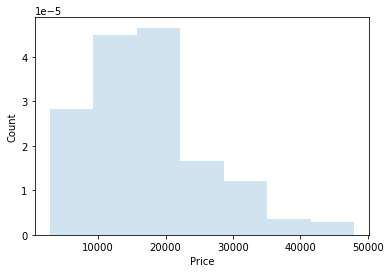

In [7]:
# This function samples the data at number 'n' per sample
sample = du.random_mean_sample(data['Price'], 50)

# label the plot
plt.xlabel("Price")
plt.ylabel("Count")

# create histogram
# note this is a sorted sample set and we remove the last one
# we know from looking at the data the last sample is messed up from a large outlier
plt.hist(sample[:-1], bins=7, density=True, histtype='stepfilled',
         alpha=0.2, label='histogram of data')

Number of samples 383


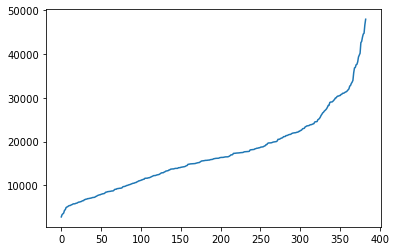

In [8]:
sample2 = sample[:-1]
plt.plot(sample2)
print('Number of samples', len(sample2))

In [9]:
mu = numpy.mean(sample2, axis=0)
sigma = numpy.std(sample2, axis=0)
print('The mean of the sampled set is: ', mu)
print('The sigma of the sampled set is: ', sigma)

The mean of the sampled set is:  17214.720626631854
The sigma of the sampled set is:  8602.999216089052


##### In conclusion, we cleaned the data enough to where we could start really looking at it and deciding how we would create a model for it.

### 2. Outlier Handling

Statement - The problem with massive outliers is that they can skew the data and make it harder to work with or understand. Many times we would want a model to be resistant against such outliers so training with them is encouraged. There are 2 main reasons we will remove some outliers for our project. 
$\newline$
1) The point of this model is to predict the price of a car. We wouldn't want to give someone a prediction that is well over value which could inflate the market or make it difficult to sell their vehicle. We also wouldn't want to tell them to give away their car for free, or just a dollar. Some cars can be cheap but generally transactions like that are prices of people giving the car to a family or friend.
$\newline$
2) When observing the data there was a car that was sold for 26 million. This is obviously a data error of some form. Maybe the van also contained quite a few gold bars. Reguardless of why, this is multiple powers of 10 outside of the normal range, and with this in mind we should remove outliers of this nature.

In [10]:
# set plot style
plt.style.use('seaborn')

# Get Path
path = 'C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/sanitized_1_final.csv'

# Reading the dataset
data = pd.read_csv(path)
print("The shape of the dataframe is: ", data.shape)

The shape of the dataframe is:  (19237, 20)


In [11]:
# Understand the data
data.describe()

,Unnamed: 0,ID,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags
count,19237.0000,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,9618.0000,4.557654e+07,1.855593e+04,632.528669,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,5553.3879,9.365914e+05,1.905813e+05,567.721688,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,0.0000,2.074688e+07,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4809.0000,4.569837e+07,5.331000e+03,0.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,9618.0000,4.577231e+07,1.317200e+04,642.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,14427.0000,4.580204e+07,2.207500e+04,917.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,19236.0000,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


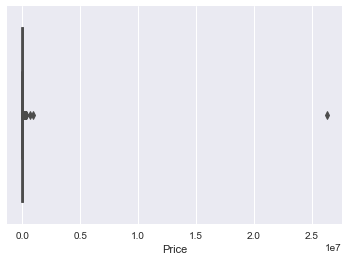

In [12]:
# This is a boxplot of the data, notice the massive outlier
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Price'])
plt.show()

As shown in the box plot above there is at least 1 super outlier that completely harms the data. Using a systematic attempt it was removed.

In [13]:
# Use data utils function for group 2
# This is the column to base the decision on 
decision_column = 'Price'
# Function Call to our utils library - see Appendix-2
Q3, Q1, filtered_data = du.remove_outliers2(data, decision_column)

# print nice answer
print(f'The lower data limit is ${Q1:.2f} and the upper data limit is ${Q3:.2f}')

# Understand the data
filtered_data.describe()

The lower data limit is $3.00 and the upper data limit is $345384.78


,Unnamed: 0,ID,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags
count,19217.000000,1.921700e+04,19217.000000,19217.000000,19217.000000,19217.000000,1.921700e+04,19217.000000,19217.000000
mean,9618.009887,4.557636e+07,17128.202061,632.751782,2010.913670,2.308102,1.421973e+06,4.582453,6.583286
std,5553.556104,9.370593e+05,18279.641947,567.652166,5.666155,0.877367,4.588801e+07,1.198624,4.319785
min,0.000000,2.074688e+07,6.000000,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4808.000000,4.569837e+07,5331.000000,0.000000,2009.000000,1.800000,7.019400e+04,4.000000,4.000000
50%,9618.000000,4.577234e+07,13172.000000,642.000000,2012.000000,2.000000,1.260210e+05,4.000000,6.000000
75%,14426.000000,4.580204e+07,22110.000000,917.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,19236.000000,4.581665e+07,308906.000000,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


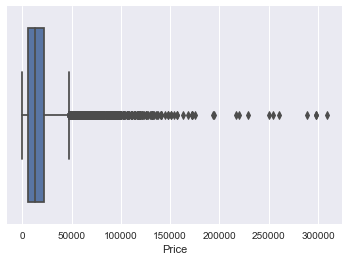

In [14]:
# This is a boxplot of the data, with outliers removed
plt.figure(figsize=(6,4))
sns.boxplot(x=filtered_data['Price'])
plt.show()

As we can see from the table and the box plot, although there are still outliers, the ones that massively skewed the data have been removed. In my opinion, more could have been removed from the bottom but we decided that it would be even on both the left and the right sides of the data. 
$\newline$
Upper percentile from base data = 0.99985
$\newline$
Lower percentile from base data = 0.00015
$\newline$

##### In conclusion, this removal was required to make an accurate model for suggesting what a costumer should sell their car for in the market.

### 3. Quantization of Categorical Variable

When we analyze the car sales data, we have the following

In [15]:
#read training data from csv file to dataframe
df = pd.read_csv('TrainingData.csv')
#display data types
df.dtypes

Unnamed: 0            int64
ID                    int64
Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Prod_year             int64
Category             object
Leather_interior     object
Fuel_type            object
Engine_volume       float64
Turbo                object
Mileage               int64
Cylinders             int64
Gear_box_type        object
Drive_wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

We can see there are columns data are "object" type. Which mean they are categorical variables. We cannot use categorical variables in the linear regression model. We have to quantize the categorical varibles to a integer or flow data type. After research we found following two methods that can use for categorical variable quantization.

#### 3.1 Quantization with Calculating Group Mean

First option of variable quntization is calculated group mean against Price. Then find proper digit for every different category type, then assigned the number. Where we will use Category column data as a test. We display all the different type of data in the category column:

In [16]:
print(df.Category.unique())

['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


We can see there are 11 types for data in Category columne. Now we need calculated Group mean price for each different type of car category:

In [17]:
# Make sure price data type is int
data_types = {}
data_types['Price'] = 'int32'
df = df.astype(data_types)
# store call type of cars in array
categoryarray = df.Category.unique()
# Creaete Price mean array
pricemeanarray = []
# Create Standard Deviations array
pricesdarray = []
#for loop calculate mean and SD for every type of car
for x in categoryarray:
    comm = "Category == '"+x+"'"
    df2 = df.query(comm)
    price = df2['Price']
    mean = price.mean()
    sd = price.std()
    pricemeanarray.append(round(mean,2))
    pricesdarray.append(round(sd,2))
#print results
print("Group Mean Price is ", pricemeanarray)
print("Standard Deviation is ",pricesdarray)
print("Group Name is", categoryarray)

Group Mean Price is  [23927.76, 11509.12, 14261.48, 17483.68, 10101.57, 22919.33, 20849.0, 20655.98, 22713.38, 13856.0, 27078.91]
Standard Deviation is  [23895.86, 9099.94, 14492.03, 11025.5, 9177.41, 17805.5, 31293.12, 14400.32, 24383.81, 13314.98, 27637.63]
Group Name is ['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


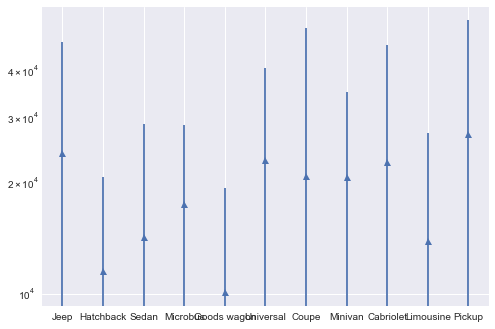

In [18]:
#plot the data for review and set price axis at log for better visibility
fig, ax = plt.subplots()
ax.errorbar(categoryarray, pricemeanarray, pricesdarray, linestyle='None', marker='^')
ax.set_yscale('log')

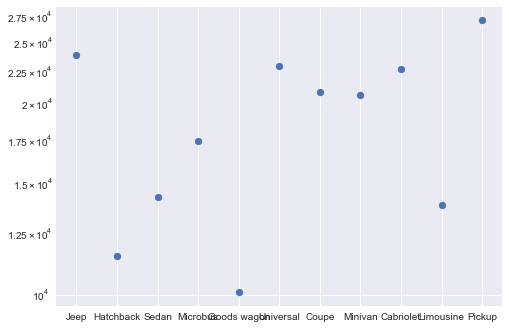

In [19]:
#plot data without standard deviations
fig, ax = plt.subplots()
ax.scatter(categoryarray,pricemeanarray)
ax.set_yscale('log')

Now bese on the price mean in every type car, we can find the max price and min price for normalization. base on $Unit Step = \frac {Max Price - Min Price}{1000}$. And assign the unit step price back to every typ of car for a number in the $(0, 1)$ interval.

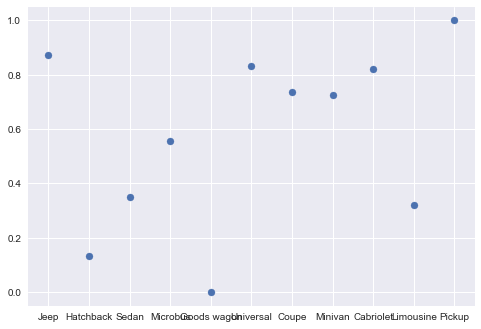

In [20]:
#imprt numpy library
import numpy as np
pricemeanarrayln = np.log(pricemeanarray)
#find max mean and min mean and calcuate unit step
minimean = pricemeanarrayln.min()
unitstep = (pricemeanarrayln.max()-pricemeanarrayln.min())/1000
#assign the unit step back to every car type
pricemeanarraynormal = (pricemeanarrayln - minimean)/unitstep/1000
#Plot data for better visibility
fig, ax = plt.subplots()
ax.scatter(categoryarray,pricemeanarraynormal)

In [21]:
#loop to print out all different number assignment for the car category
j = len(categoryarray)
i = 0
for i in range(j):
    print(categoryarray[i], "normallization number is ", pricemeanarraynormal[i])
    i = i+1

Jeep normallization number is  0.8745356666201155
Hatchback normallization number is  0.13229249056919942
Sedan normallization number is  0.349745270699173
Microbus normallization number is  0.5563298412491332
Goods wagon normallization number is  0.0
Universal normallization number is  0.8308685039568255
Coupe normallization number is  0.7348558300196918
Minivan normallization number is  0.7254232613366441
Cabriolet normallization number is  0.8217144550817334
Limousine normallization number is  0.32049378734106937
Pickup normallization number is  0.9999999999999999


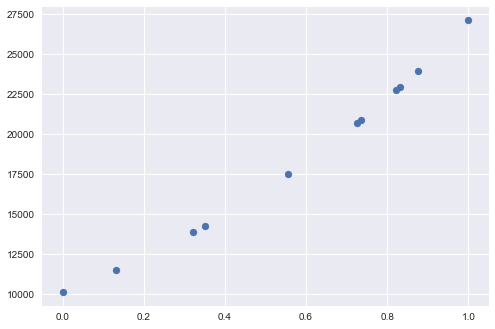

In [22]:
#plot data with number assigned to every different car category
fig, ax = plt.subplots()
ax.scatter(pricemeanarraynormal, pricemeanarray)

We can see that we should be able to use this mothed for the Category Column. However, we also found another solution for variable quantization called One-Hot-Encoding.

#### 3.2 One-Hot-Encoding (Add Dummies)

After more research, we found another solution for variable quantization is called One-Hot_Encoding which is adding dummy variable columnes for every category and substract one $n-1$. We will test this in Category Column again:

In [23]:
print(df.Category.unique())

['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']


Again, we see there are 11 different car categories in total. Now we apply One-Hot-Encoding to Category columns simply by using get_dummies() fuction in Pandas dataframe 

In [24]:
#assign category data out to categry sub data frame for testing
category = df.Category
#try one-hot-encoding
pd.get_dummies(category)

,Cabriolet,Coupe,Goods wagon,Hatchback,Jeep,Limousine,Microbus,Minivan,Pickup,Sedan,Universal
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13448,0,0,0,0,0,0,0,0,0,1,0
13449,0,0,0,0,0,0,0,0,0,1,0
13450,0,0,0,1,0,0,0,0,0,0,0
13451,0,0,0,0,1,0,0,0,0,0,0


Now we can try this in the main training data frame:

In [25]:
pd.get_dummies(df, columns=["Category"], drop_first = True)

,Unnamed: 0,ID,Price,Levy,Manufacturer,Model,Prod_year,Leather_interior,Fuel_type,Engine_volume,...,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Yes,Hybrid,3.5,...,0,0,0,1,0,0,0,0,0,0
1,1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,No,Petrol,3.0,...,0,0,0,1,0,0,0,0,0,0
2,2,45774419,8467,0,HONDA,FIT,2006,No,Petrol,1.3,...,0,0,1,0,0,0,0,0,0,0
3,3,45769185,3607,862,FORD,ESCAPE,2011,Yes,Hybrid,2.5,...,0,0,0,1,0,0,0,0,0,0
4,4,45809263,11726,446,HONDA,FIT,2014,Yes,Petrol,1.3,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13448,13462,45802417,21103,1104,HYUNDAI,GRANDEUR,2015,Yes,LPG,3.0,...,0,0,0,0,0,0,0,0,1,0
13449,13463,44631202,13172,530,HYUNDAI,ELANTRA,2013,Yes,Petrol,1.6,...,0,0,0,0,0,0,0,0,1,0
13450,13464,45669073,19757,353,TOYOTA,PRIUS,2015,No,Hybrid,1.8,...,0,0,1,0,0,0,0,0,0,0
13451,13465,45647811,1019,917,BMW,X5,2013,Yes,Diesel,3.0,...,0,0,0,1,0,0,0,0,0,0


Looks like one-hot-encoding is much simply solution compare to calculate group mean.

#### 3.3 Conclution

After research, we have found that there are two method for variable quantization. One if calculate group mean and one is One-Hot-Encoding. As group we have decide to use One-Hot-Encoding for all the categorical variable columns except two columns. Which are Manufacture and Models. We can see following:

In [26]:
print("Total unique value in Manufacturer columne is ",len(df.Manufacturer.unique()))
print("Total unique value in Model columne is ",len(df.Model.unique()))

Total unique value in Manufacturer columne is  64
Total unique value in Model columne is  1227


These number are large and Model is heavely depend on manufacturer (we will show that in following section). Then we decide to use group mean calculation for these two columns.

### 4. Column Independence Analyzation

One of assumption made for linear regression model was $X$ column data are independent to each other. Only $Y$ column data is dependent data. In our case $Y$ is price. Now we need to test the independency of $X$ columns. First, we needed load training data:

In [27]:
df = pd.read_csv('TrainingData.csv')
df

,Unnamed: 0,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Turbo,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,NaN,186005,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12
1,1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,Jeep,No,Petrol,3.0,NaN,192000,6,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
2,2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,NaN,200000,4,Variator,Front,4-5,Right-hand drive,Black,2
3,3,45769185,3607,862,FORD,ESCAPE,2011,Jeep,Yes,Hybrid,2.5,NaN,168966,4,Automatic,Front-Rear,4-5,Left wheel,White,0
4,4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,NaN,91901,4,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13448,13462,45802417,21103,1104,HYUNDAI,GRANDEUR,2015,Sedan,Yes,LPG,3.0,NaN,273249,4,Automatic,Front,4-5,Left wheel,Black,4
13449,13463,44631202,13172,530,HYUNDAI,ELANTRA,2013,Sedan,Yes,Petrol,1.6,NaN,75000,4,Tiptronic,Front,4-5,Left wheel,White,8
13450,13464,45669073,19757,353,TOYOTA,PRIUS,2015,Hatchback,No,Hybrid,1.8,NaN,105000,4,Automatic,Front,4-5,Left wheel,Silver,8
13451,13465,45647811,1019,917,BMW,X5,2013,Jeep,Yes,Diesel,3.0,NaN,137802,6,Automatic,Front-Rear,4-5,Left wheel,Black,0


We know that there are different type data in the training data set. We have to analyze them in following 3 different ways.

#### 4.1 Heat Map for Columns With Digit Data

Now let's seperate the data frame and creat a new data frame ddf encoding as "Digit Data Frame".

In [28]:
ddf = df[['Price','Levy', 'Prod_year', 'Engine_volume', 'Mileage', 'Cylinders', 'Airbags']]
ddf

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags
0,13328,1399,2010,3.5,186005,6,12
1,16621,1018,2011,3.0,192000,6,8
2,8467,0,2006,1.3,200000,4,2
3,3607,862,2011,2.5,168966,4,0
4,11726,446,2014,1.3,91901,4,4
...,...,...,...,...,...,...,...
13448,21103,1104,2015,3.0,273249,4,4
13449,13172,530,2013,1.6,75000,4,8
13450,19757,353,2015,1.8,105000,4,8
13451,1019,917,2013,3.0,137802,6,0


In [29]:
# find correlation numbers
ddf.corr()

,Price,Levy,Prod_year,Engine_volume,Mileage,Cylinders,Airbags
Price,1.000000,0.043694,0.287841,0.130153,-0.017634,0.104799,-0.019300
Levy,0.043694,1.000000,0.381583,0.375368,-0.026169,0.241199,0.126134
Prod_year,0.287841,0.381583,1.000000,-0.034592,-0.069824,-0.099391,0.238808
Engine_volume,0.130153,0.375368,-0.034592,1.000000,-0.012121,0.782648,0.225086
Mileage,-0.017634,-0.026169,-0.069824,-0.012121,1.000000,-0.009870,-0.006051
Cylinders,0.104799,0.241199,-0.099391,0.782648,-0.009870,1.000000,0.170400
Airbags,-0.019300,0.126134,0.238808,0.225086,-0.006051,0.170400,1.000000


<AxesSubplot:>

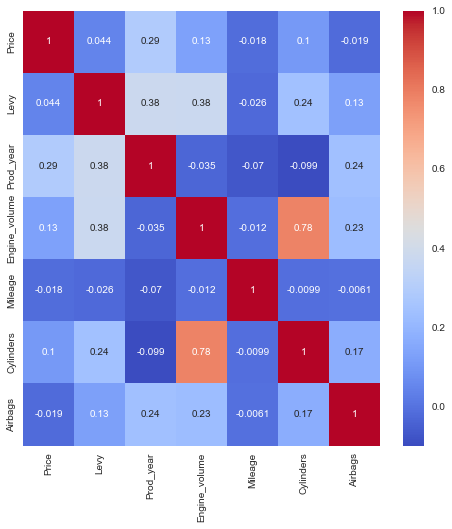

In [30]:
# plot heat map base on the correlation numbers
plt.figure(figsize=(8,8))
sns.heatmap(ddf.corr(), annot=True, cmap='coolwarm')

We can see that base on the heat map most columns are good with indenpendency. Only exception is column Engine_volume and Cylinders. Which it makes alot sense that when Engine_vlume increase the Cylinders will increase too.

#### 4.2 Analyze the Categorical Variable Column with Heat-Map-like Plot

We cannot get correlation number from corr() function in the Pandas dataframe to create heat Map. However, we can pivot the data apparance to compare two categorical variable columns. When data appare only in one row and one column for majority of data in two columns. We can see the dependency of the two categorical variable column. We need to load categorical variable only column to a new data frame "cdf" as categorical data frame.

In [31]:
cdf = df[['Manufacturer','Model', 'Category', 'Leather_interior', 'Fuel_type', 'Gear_box_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color']]
cdf

,Manufacturer,Model,Category,Leather_interior,Fuel_type,Gear_box_type,Drive_wheels,Doors,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,Front-Rear,4-5,Left wheel,Silver
1,CHEVROLET,EQUINOX,Jeep,No,Petrol,Tiptronic,Front-Rear,4-5,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,4-5,Right-hand drive,Black
3,FORD,ESCAPE,Jeep,Yes,Hybrid,Automatic,Front-Rear,4-5,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,Automatic,Front,4-5,Left wheel,Silver
...,...,...,...,...,...,...,...,...,...,...
13448,HYUNDAI,GRANDEUR,Sedan,Yes,LPG,Automatic,Front,4-5,Left wheel,Black
13449,HYUNDAI,ELANTRA,Sedan,Yes,Petrol,Tiptronic,Front,4-5,Left wheel,White
13450,TOYOTA,PRIUS,Hatchback,No,Hybrid,Automatic,Front,4-5,Left wheel,Silver
13451,BMW,X5,Jeep,Yes,Diesel,Automatic,Front-Rear,4-5,Left wheel,Black


##### 4.2.1 Manufacturer vs Model

In [32]:
# Training Data Frame is too large, let try first 50
cdf1 = cdf.head(50)
# count the Manufacturer and Model data apparence
cdf_counts = cdf1.groupby(['Manufacturer', 'Model']).size()
cdf_counts = cdf_counts.reset_index(name = 'count')
# pivate the data
cdf_counts = cdf_counts.pivot(index = 'Model', columns = 'Manufacturer', values = 'count')
cdf_counts

Manufacturer,BMW,CHEVROLET,FORD,HONDA,HYUNDAI,JEEP,LEXUS,MERCEDES-BENZ,OPEL,PORSCHE,TOYOTA,VOLKSWAGEN
Model,,,,,,,,,,,,
AQUA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
CAMRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
CAYENNE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
CHR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
CHR LIMITED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
E 220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
E 350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
ELANTRA,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EQUINOX,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Manufacturer', ylabel='Model'>

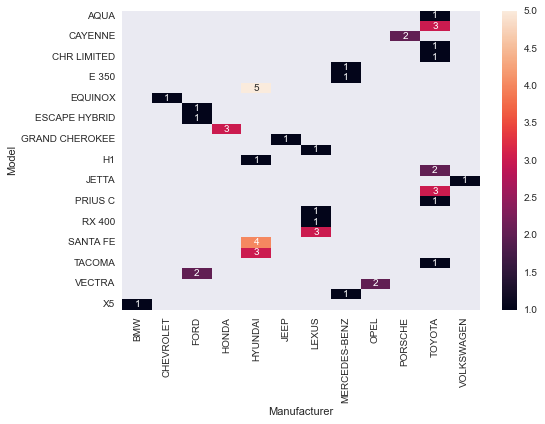

In [33]:
#plot heat map
sns.heatmap(cdf_counts, annot = True)

We can see that the data apperance on the row of model is depend on the manufacturer. This is normal, as model normally is manufacturer trade mark, they are only depend on manufacturer. For example, when Tesla first time create the Model 3 cars, the idea was use Model E. However, Model E is trade mark of Ford. That is why Tesla is using Model 3. Solution of handling of the data is in section 4.5

##### 4.2.2 Manufacturer vs Category

In [34]:
# count the Manufacturer and Category data apparence
cdf_counts = cdf.groupby(['Manufacturer', 'Category']).size()
cdf_counts = cdf_counts.reset_index(name = 'count')
# pivate the data
cdf_counts = cdf_counts.pivot(index = 'Category', columns = 'Manufacturer', values = 'count')
cdf_counts

Manufacturer,ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,BENTLEY,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,...,SSANGYONG,SUBARU,SUZUKI,TESLA,TOYOTA,UAZ,VAZ,VOLKSWAGEN,VOLVO,ZAZ
Category,,,,,,,,,,,,,,,,,,,,,
Cabriolet,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coupe,NaN,1.0,1.0,9.0,1.0,61.0,NaN,1.0,8.0,2.0,...,NaN,1.0,NaN,NaN,16.0,1.0,NaN,4.0,2.0,1.0
Goods wagon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN
Hatchback,NaN,1.0,NaN,23.0,NaN,14.0,NaN,NaN,122.0,2.0,...,NaN,14.0,13.0,NaN,830.0,NaN,1.0,59.0,NaN,NaN
Jeep,4.0,NaN,NaN,44.0,NaN,300.0,3.0,3.0,212.0,NaN,...,302.0,108.0,28.0,NaN,453.0,6.0,12.0,18.0,4.0,NaN
Limousine,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Microbus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,2.0,NaN,3.0,NaN,NaN
Minivan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,1.0,NaN,NaN,NaN,47.0,NaN,NaN,7.0,NaN,NaN
Pickup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,9.0,1.0,NaN,1.0,NaN,NaN


<AxesSubplot:xlabel='Manufacturer', ylabel='Category'>

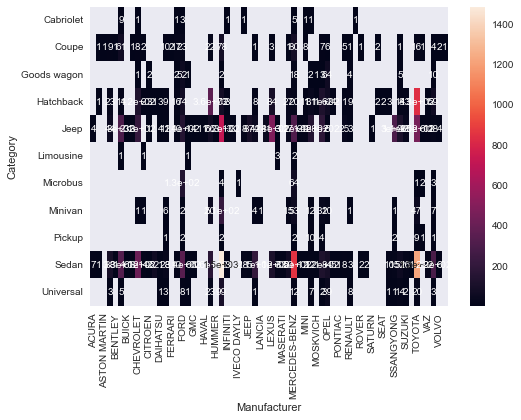

In [35]:
#plot heat map
sns.heatmap(cdf_counts, annot = True)

Unlike the 4.2.1 Manufacturer vs Model, Manufacturer vs Category showing independence as categoery data appearance is distribute every where across manufacturer. This is normal, because manufacturer cannot trade mark car category. All manufacturer can make any category of cars as they like.

##### 4.2.3 Manufacturer vs Fuel Type

In [36]:
# count the Manufacturer and Fuel Type data apparence
cdf_counts = cdf.groupby(['Manufacturer', 'Fuel_type']).size()
cdf_counts = cdf_counts.reset_index(name = 'count')
# pivate the data
cdf_counts = cdf_counts.pivot(index = 'Fuel_type', columns = 'Manufacturer', values = 'count')
cdf_counts

Manufacturer,ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,BENTLEY,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,...,SSANGYONG,SUBARU,SUZUKI,TESLA,TOYOTA,UAZ,VAZ,VOLKSWAGEN,VOLVO,ZAZ
Fuel_type,,,,,,,,,,,,,,,,,,,,,
CNG,NaN,NaN,NaN,2.0,NaN,19.0,NaN,1.0,NaN,NaN,...,NaN,12.0,4.0,NaN,15.0,2.0,2.0,31.0,NaN,NaN
Diesel,NaN,NaN,NaN,13.0,NaN,172.0,NaN,NaN,188.0,NaN,...,283.0,NaN,1.0,NaN,37.0,NaN,NaN,66.0,NaN,NaN
Hybrid,NaN,NaN,NaN,2.0,NaN,6.0,NaN,NaN,77.0,NaN,...,NaN,13.0,NaN,NaN,1507.0,NaN,NaN,5.0,NaN,NaN
Hydrogen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LPG,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,12.0,1.0,...,NaN,5.0,1.0,NaN,26.0,NaN,NaN,5.0,NaN,NaN
Petrol,11.0,3.0,1.0,150.0,2.0,506.0,9.0,11.0,444.0,19.0,...,38.0,163.0,53.0,1.0,1007.0,8.0,33.0,284.0,12.0,1.0
Plug-in Hybrid,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,31.0,NaN,...,NaN,1.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Manufacturer', ylabel='Fuel_type'>

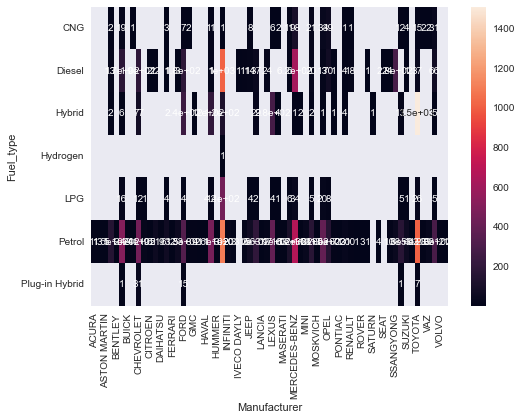

In [37]:
#plot heat map
sns.heatmap(cdf_counts, annot = True)

Same to 4.2.2 Manufacturer vs Category, Manufactuer vs Fuel Type is also showing independency of the fuel type with one exception of Hydrogen. Looks like we don't have enough traning data for the Hydrogen type. This could lead to large error during the training the model at Hydrogen fuel type.

##### 4.2.4 Manufacturer vs Gear Box Type

In [38]:
# count the Manufacturer and Fuel Type data apparence
cdf_counts = cdf.groupby(['Manufacturer', 'Gear_box_type']).size()
cdf_counts = cdf_counts.reset_index(name = 'count')
# pivate the data
cdf_counts = cdf_counts.pivot(index = 'Gear_box_type', columns = 'Manufacturer', values = 'count')
cdf_counts

Manufacturer,ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,BENTLEY,BMW,BUICK,CADILLAC,CHEVROLET,CHRYSLER,...,SSANGYONG,SUBARU,SUZUKI,TESLA,TOYOTA,UAZ,VAZ,VOLKSWAGEN,VOLVO,ZAZ
Gear_box_type,,,,,,,,,,,,,,,,,,,,,
Automatic,11.0,NaN,NaN,100.0,1.0,271.0,8.0,11.0,664.0,14.0,...,321.0,117.0,36.0,1.0,1976.0,NaN,NaN,128.0,7.0,NaN
Manual,NaN,2.0,NaN,11.0,NaN,89.0,NaN,1.0,14.0,1.0,...,NaN,11.0,16.0,NaN,40.0,10.0,34.0,119.0,2.0,1.0
Tiptronic,NaN,1.0,1.0,55.0,1.0,360.0,1.0,NaN,69.0,5.0,...,NaN,53.0,4.0,NaN,284.0,NaN,1.0,144.0,3.0,NaN
Variator,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,13.0,3.0,NaN,299.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Manufacturer', ylabel='Gear_box_type'>

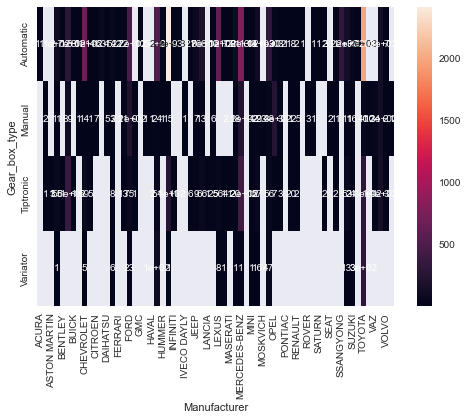

In [39]:
#plot heat map
sns.heatmap(cdf_counts, annot = True)

We can see the gear box type has distribute on more than one manufacturer. This show the independency of these two columns.

##### 4.2.5 Category vs Wheel

In [40]:
# count the Category and Wheel data apparence
cdf_counts = cdf.groupby(['Category', 'Wheel']).size()
cdf_counts = cdf_counts.reset_index(name = 'count')
# pivate the data
cdf_counts = cdf_counts.pivot(index = 'Wheel', columns = 'Category', values = 'count')
cdf_counts

Category,Cabriolet,Coupe,Goods wagon,Hatchback,Jeep,Limousine,Microbus,Minivan,Pickup,Sedan,Universal
Wheel,,,,,,,,,,,
Left wheel,24.0,357.0,156.0,1473.0,3727.0,8.0,200.0,328.0,33.0,5870.0,217.0
Right-hand drive,NaN,19.0,11.0,525.0,105.0,NaN,5.0,134.0,1.0,224.0,36.0


<AxesSubplot:xlabel='Category', ylabel='Wheel'>

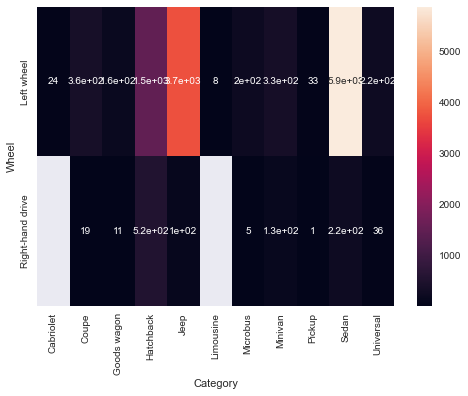

In [41]:
#plot heat map
sns.heatmap(cdf_counts, annot = True)

We can see heat map has showing the clearly independency for Category vs Wheel

##### 4.2.6 Fuel Type vs Wheel

In [42]:
# count the Fuel type and Wheel data apparence
cdf_counts = cdf.groupby(['Fuel_type', 'Wheel']).size()
cdf_counts = cdf_counts.reset_index(name = 'count')
# pivate the data
cdf_counts = cdf_counts.pivot(index = 'Wheel', columns = 'Fuel_type', values = 'count')
cdf_counts

Fuel_type,CNG,Diesel,Hybrid,Hydrogen,LPG,Petrol,Plug-in Hybrid
Wheel,,,,,,,
Left wheel,280.0,2785.0,2276.0,1.0,563.0,6434.0,54.0
Right-hand drive,62.0,25.0,212.0,NaN,50.0,710.0,1.0


<AxesSubplot:xlabel='Fuel_type', ylabel='Wheel'>

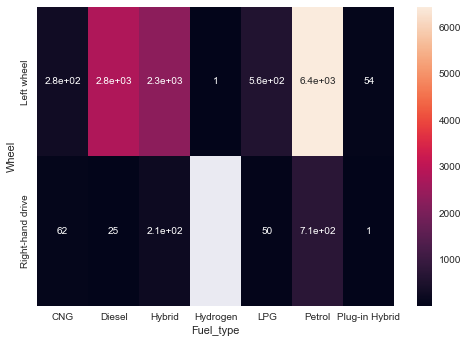

In [43]:
#plot heat map
sns.heatmap(cdf_counts, annot = True)

We can see heat map has showing the clearly independency for Fuel Type vs Wheel

#### 4.3 Analyze the Categorical Variable Column with Digit Variable Column

Now we have to analyze the categorical variable column with regular digit variable column. We are using box plot to analyze these different type data column indenpendency.

##### 4.3.1 Production Year vs Gear Box Type

<AxesSubplot:xlabel='Gear_box_type', ylabel='Prod_year'>

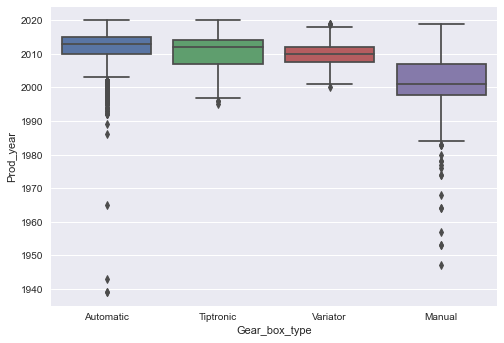

In [44]:
sns.boxplot(y='Prod_year',x="Gear_box_type", data=df)

From the box plot we can see that production year and gear box type are indenpendent, because one production year can have more than one gear box type. Gear box type are not year specific in the morjorty of the data.

##### 4.3.2 Production Year vs Model Type

<AxesSubplot:xlabel='Model', ylabel='Prod_year'>

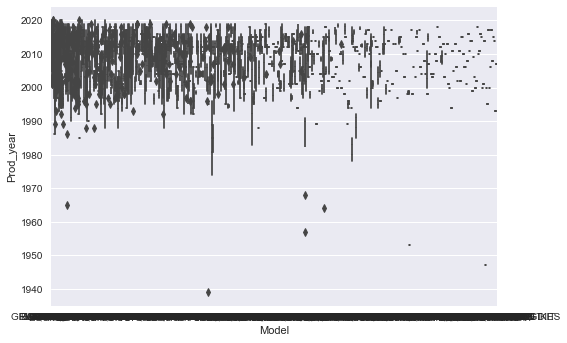

In [45]:
sns.boxplot(y='Prod_year',x="Model", data=df)

From the box plot we can see that production year and model are indenpendent, because one production year can have more than one model made. Car models are not year specific in the morjorty case of the data.

#### 4.4 Special Case of Engine Volume with Turbo Column

When we first time processing the data, we have seperate the Engine Volumn with/with-out Turbo. And we have created Turbo as new column for easy processing. Then we know Turbo is dependent to Engine Volumn. We need to find way to combine the Turbo column back to Engine Volume column. We will use group mean to calculate the coefficient of car has Turbo and not has Turbo.

$X_{EngineVolue}(\hat \theta X_{Turbo})$

In [46]:
#replace null data with 0
df['Turbo']=df['Turbo'].fillna(0)
#set a new data frame with Price Engine_volume and Turbo
tdf= df[['Price','Engine_volume','Turbo']]
tdf

,Price,Engine_volume,Turbo
0,13328,3.5,0
1,16621,3.0,0
2,8467,1.3,0
3,3607,2.5,0
4,11726,1.3,0
...,...,...,...
13448,21103,3.0,0
13449,13172,1.6,0
13450,19757,1.8,0
13451,1019,3.0,0


In [47]:
#drop non turbo
tdf = tdf.drop(tdf[tdf.Turbo == 0].index)
tdf

,Price,Engine_volume,Turbo
23,7840,2.0,Turbo
25,20385,2.2,Turbo
30,15681,2.0,Turbo
34,24462,3.0,Turbo
42,20165,1.4,Turbo
...,...,...,...
13403,21639,2.4,Turbo
13415,11917,1.4,Turbo
13431,16621,2.0,Turbo
13432,17249,2.0,Turbo


In [48]:
#create data frame with non turbo car
ntdf = df[['Price','Engine_volume','Turbo']]
ntdf = ntdf.drop(ntdf[ntdf.Turbo == "Turbo"].index)
ntdf

,Price,Engine_volume,Turbo
0,13328,3.5,0
1,16621,3.0,0
2,8467,1.3,0
3,3607,2.5,0
4,11726,1.3,0
...,...,...,...
13448,21103,3.0,0
13449,13172,1.6,0
13450,19757,1.8,0
13451,1019,3.0,0


In [49]:
#calcuate Theta hat
withturbopricemean = tdf['Price'].mean()
withoutturbopricemean = ntdf['Price'].mean()
Thetahat = withturbopricemean/withoutturbopricemean
print("\u0302\u0398 is", Thetahat)

̂Θ is 1.7554345902046502


#### 4.5 Make, Model, and Turbo Handling

Statement - The problem with make and model was that they weren't very usable in their current state. We had many choices for regression, but for most of our predictions with categorical data we wanted to use the One Hot Code approach. This would be impractical for how many different make and models there were. Also, we decided to simplify turbo by calculating a coefficient for it and then multiplying it into the engine volume.
$\newline$
1) The Make is almost superceeded by the Model in terms of defining a category. For this we merged the two columns
$\newline$
2) We decided that average mean would be a better representation categorically for the Model column.
$\newline$
3) Turbo was easier to deal with as a coefficient multiplied into engine volume

In [50]:
# Get Path
path = 'C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/FilterData.csv'

# Reading the dataset
data = pd.read_csv(path)

# Show sample of the dataset
display(data.head(10))

,Unnamed: 0,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Turbo,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,NaN,186005,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12
1,1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,Jeep,No,Petrol,3.0,NaN,192000,6,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
2,2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,NaN,200000,4,Variator,Front,4-5,Right-hand drive,Black,2
3,3,45769185,3607,862,FORD,ESCAPE,2011,Jeep,Yes,Hybrid,2.5,NaN,168966,4,Automatic,Front-Rear,4-5,Left wheel,White,0
4,4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,NaN,91901,4,Automatic,Front,4-5,Left wheel,Silver,4
5,5,45802912,39493,891,HYUNDAI,SANTA FE,2016,Jeep,Yes,Diesel,2.0,NaN,160931,4,Automatic,Front,4-5,Left wheel,White,4
6,6,45656768,1803,761,TOYOTA,PRIUS,2010,Hatchback,Yes,Hybrid,1.8,NaN,258909,4,Automatic,Front,4-5,Left wheel,White,12
7,7,45816158,549,751,HYUNDAI,SONATA,2013,Sedan,Yes,Petrol,2.4,NaN,216118,4,Automatic,Front,4-5,Left wheel,Grey,12
8,8,45641395,1098,394,TOYOTA,CAMRY,2014,Sedan,Yes,Hybrid,2.5,NaN,398069,4,Automatic,Front,4-5,Left wheel,Black,12
9,9,45756839,26657,0,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,NaN,128500,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12


First, we need to combine the two columns. This can be a simple set of column manipulations

In [51]:
# Make new column
data_combo = data['Manufacturer'] + '-' + data['Model']

# Make a copy to preserve original for re-run purposes
data2 = data.copy()

# Insert out new column
data2.insert(loc = 4,
          column = 'MakeModel',
          value = data_combo)

# Drop old columns
data2.drop(['Manufacturer', 'Model'], axis=1, inplace=True)

# Show sample of the dataset
display(data2.head(10))

,Unnamed: 0,ID,Price,Levy,MakeModel,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Turbo,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,0,45654403,13328,1399,LEXUS-RX 450,2010,Jeep,Yes,Hybrid,3.5,NaN,186005,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12
1,1,44731507,16621,1018,CHEVROLET-EQUINOX,2011,Jeep,No,Petrol,3.0,NaN,192000,6,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
2,2,45774419,8467,0,HONDA-FIT,2006,Hatchback,No,Petrol,1.3,NaN,200000,4,Variator,Front,4-5,Right-hand drive,Black,2
3,3,45769185,3607,862,FORD-ESCAPE,2011,Jeep,Yes,Hybrid,2.5,NaN,168966,4,Automatic,Front-Rear,4-5,Left wheel,White,0
4,4,45809263,11726,446,HONDA-FIT,2014,Hatchback,Yes,Petrol,1.3,NaN,91901,4,Automatic,Front,4-5,Left wheel,Silver,4
5,5,45802912,39493,891,HYUNDAI-SANTA FE,2016,Jeep,Yes,Diesel,2.0,NaN,160931,4,Automatic,Front,4-5,Left wheel,White,4
6,6,45656768,1803,761,TOYOTA-PRIUS,2010,Hatchback,Yes,Hybrid,1.8,NaN,258909,4,Automatic,Front,4-5,Left wheel,White,12
7,7,45816158,549,751,HYUNDAI-SONATA,2013,Sedan,Yes,Petrol,2.4,NaN,216118,4,Automatic,Front,4-5,Left wheel,Grey,12
8,8,45641395,1098,394,TOYOTA-CAMRY,2014,Sedan,Yes,Hybrid,2.5,NaN,398069,4,Automatic,Front,4-5,Left wheel,Black,12
9,9,45756839,26657,0,LEXUS-RX 350,2007,Jeep,Yes,Petrol,3.5,NaN,128500,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12


Next, we need to mean all the various cars by MakeModel set values

In [52]:
# get all unique make-model combos
categoryarray = data2.MakeModel.unique()

# loop and query required mean information
pricemeanarray = []
pricesdarray = []
for x in categoryarray:
    comm = "MakeModel == '"+x+"'"
    df = data2.query(comm)
    price = df['Price']
    mean = price.mean()
    sd = price.std()
    pricemeanarray.append(round(mean,2))
    pricesdarray.append(round(sd,2))

# convert to numpy array
npArray = np.array(pricemeanarray)

Below is shown the values that will be used to scale all numbers between 0 and 1

In [53]:
# show values
print('The minimum average of any MakeModel is:', npArray.min())
print('The maximum average of any MakeModel is:', npArray.max())
print('The number of MakeModel uniques is:', len(categoryarray))

The minimum average of any MakeModel is: 34.0
The maximum average of any MakeModel is: 297930.0
The number of MakeModel uniques is: 1490


Finally, we create a lookup table and do replacements into a final dataframe

In [54]:
# formula to convert all average values from 0 to 1
replace_weight = (npArray-npArray.min())/npArray.max()

# create lookup table
replace_table = {'Value':replace_weight,'MakeModel':categoryarray}
replace_table = pd.DataFrame(replace_table)

# Show sample of the dataset
display(replace_table.head(10))

,Value,MakeModel
0,0.035710,LEXUS-RX 450
1,0.029261,CHEVROLET-EQUINOX
2,0.037106,HONDA-FIT
3,0.027494,FORD-ESCAPE
4,0.133393,HYUNDAI-SANTA FE
5,0.038329,TOYOTA-PRIUS
6,0.048425,HYUNDAI-SONATA
7,0.042147,TOYOTA-CAMRY
8,0.055940,LEXUS-RX 350
9,0.033829,MERCEDES-BENZ-E 350


In [55]:
# replace values from lookuptable
result = data2.replace(dict(zip(replace_table.MakeModel, replace_table.Value)))

# Show sample of the dataset
display(result.head(10))

,Unnamed: 0,ID,Price,Levy,MakeModel,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Turbo,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,0,45654403,13328,1399,0.035710,2010,Jeep,Yes,Hybrid,3.5,NaN,186005,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12
1,1,44731507,16621,1018,0.029261,2011,Jeep,No,Petrol,3.0,NaN,192000,6,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
2,2,45774419,8467,0,0.037106,2006,Hatchback,No,Petrol,1.3,NaN,200000,4,Variator,Front,4-5,Right-hand drive,Black,2
3,3,45769185,3607,862,0.027494,2011,Jeep,Yes,Hybrid,2.5,NaN,168966,4,Automatic,Front-Rear,4-5,Left wheel,White,0
4,4,45809263,11726,446,0.037106,2014,Hatchback,Yes,Petrol,1.3,NaN,91901,4,Automatic,Front,4-5,Left wheel,Silver,4
5,5,45802912,39493,891,0.133393,2016,Jeep,Yes,Diesel,2.0,NaN,160931,4,Automatic,Front,4-5,Left wheel,White,4
6,6,45656768,1803,761,0.038329,2010,Hatchback,Yes,Hybrid,1.8,NaN,258909,4,Automatic,Front,4-5,Left wheel,White,12
7,7,45816158,549,751,0.048425,2013,Sedan,Yes,Petrol,2.4,NaN,216118,4,Automatic,Front,4-5,Left wheel,Grey,12
8,8,45641395,1098,394,0.042147,2014,Sedan,Yes,Hybrid,2.5,NaN,398069,4,Automatic,Front,4-5,Left wheel,Black,12
9,9,45756839,26657,0,0.055940,2007,Jeep,Yes,Petrol,3.5,NaN,128500,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12


In [56]:
# sort values by ID which will allow them to be sudo random
result = result.sort_values(by=['ID'])

In [57]:
# Split dataset

# data length
n = len(result)
# amount for testing/validation each
t = int(n*.15)
# amount for training
training = n-t*2

#create data sets
result.sort_values(by=['ID'])
training = result.head(training)
test = result.tail(t*2).head(t)
validation = result.tail(t)

# show values
print('The amount of training records is:', len(training))
print('The amount of test records is:', len(test))
print('The amount of validation records is:', len(validation))

The amount of training records is: 13453
The amount of test records is: 2882
The amount of validation records is: 2882


In [58]:
# Save progress to files as artifacts
training.to_csv('C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/TrainingData2.csv',index=False,line_terminator='\n')
test.to_csv('C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/TestData2.csv',index=False,line_terminator='\n')
validation.to_csv('C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/ValidationData2.csv',index=False,line_terminator='\n')
replace_table.to_csv('C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/MakeModelReplaceTable.csv',index=False,line_terminator='\n')

The coeffience for turbo was calculated to be 1.7554345902046502. As we had already separated turbo from engine volume, it was easy to make a direct substitution.

In [59]:
# replace values from Turbo to the coefficient
result = result.replace( 'Turbo', 1.7554345902046502)
result['Turbo'] = result['Turbo'].fillna(1)

# Show sample of the dataset
display(result.head(20))

,Unnamed: 0,ID,Price,Levy,MakeModel,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Turbo,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
11207,11219,20746880,157,0,0.046772,1939,Limousine,Yes,Petrol,2.4,1.000000,126000,4,Automatic,Rear,4-5,Left wheel,White,0
13212,13225,23242980,200,0,0.141307,2017,Jeep,Yes,Petrol,2.7,1.000000,95000,4,Automatic,Front-Rear,5,Left wheel,Black,10
13558,13572,24367759,85702,0,0.299423,2013,Microbus,Yes,Diesel,2.2,1.755435,225000,6,Manual,Rear,2-3,Left wheel,White,4
3640,3643,24701923,130,0,0.058867,2006,Jeep,Yes,Petrol,4.4,1.000000,90000,8,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
5504,5509,24940334,25089,0,0.057150,1999,Limousine,Yes,Petrol,5.4,1.000000,99000,8,Automatic,Front-Rear,4-5,Left wheel,White,4
19041,19061,25368573,12544,0,0.029406,2002,Sedan,Yes,CNG,2.5,1.000000,220000,6,Tiptronic,Rear,4-5,Left wheel,Silver,8
11412,11424,26248496,150,0,0.081655,2012,Microbus,Yes,Diesel,3.2,1.755435,200000,6,Manual,Rear,4-5,Left wheel,Silver,2
15835,15852,26327387,87021,0,0.299423,2013,Microbus,Yes,Diesel,2.2,1.755435,240000,8,Manual,Rear,4-5,Left wheel,White,2
14948,14964,26465408,43000,0,0.041607,2011,Jeep,Yes,Diesel,3.0,1.000000,190000,6,Tiptronic,Front-Rear,4-5,Left wheel,Grey,12
10254,10265,26556126,157,0,0.000485,1939,Cabriolet,Yes,Petrol,5.0,1.000000,129000,8,Automatic,Rear,4-5,Left wheel,Silver,0


In [60]:
# Combine the columns into 1 unified column
combo = result['Turbo'].astype(float) * result['Engine_volume'].astype(float)
display(combo.head(20))

11207    2.400000
13212    2.700000
13558    3.861956
3640     4.400000
5504     5.400000
19041    2.500000
11412    5.617391
15835    3.861956
14948    3.000000
10254    5.000000
14140    1.800000
2490     2.800000
4466     3.861956
9490     3.200000
14915    4.000000
8046     5.500000
9874     2.400000
12320    2.200000
11146    1.500000
252      1.500000
dtype: float64

In [61]:
# Drop old columns
result.drop(['Engine_volume', 'Turbo'], axis=1, inplace=True)

# Insert out new column
result.insert(loc = 10,
          column = 'Engine_volume',
          value = combo)

# display results
display(result.head(20))

,Unnamed: 0,ID,Price,Levy,MakeModel,Prod_year,Category,Leather_interior,Fuel_type,Mileage,Engine_volume,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
11207,11219,20746880,157,0,0.046772,1939,Limousine,Yes,Petrol,126000,2.400000,4,Automatic,Rear,4-5,Left wheel,White,0
13212,13225,23242980,200,0,0.141307,2017,Jeep,Yes,Petrol,95000,2.700000,4,Automatic,Front-Rear,5,Left wheel,Black,10
13558,13572,24367759,85702,0,0.299423,2013,Microbus,Yes,Diesel,225000,3.861956,6,Manual,Rear,2-3,Left wheel,White,4
3640,3643,24701923,130,0,0.058867,2006,Jeep,Yes,Petrol,90000,4.400000,8,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
5504,5509,24940334,25089,0,0.057150,1999,Limousine,Yes,Petrol,99000,5.400000,8,Automatic,Front-Rear,4-5,Left wheel,White,4
19041,19061,25368573,12544,0,0.029406,2002,Sedan,Yes,CNG,220000,2.500000,6,Tiptronic,Rear,4-5,Left wheel,Silver,8
11412,11424,26248496,150,0,0.081655,2012,Microbus,Yes,Diesel,200000,5.617391,6,Manual,Rear,4-5,Left wheel,Silver,2
15835,15852,26327387,87021,0,0.299423,2013,Microbus,Yes,Diesel,240000,3.861956,8,Manual,Rear,4-5,Left wheel,White,2
14948,14964,26465408,43000,0,0.041607,2011,Jeep,Yes,Diesel,190000,3.000000,6,Tiptronic,Front-Rear,4-5,Left wheel,Grey,12
10254,10265,26556126,157,0,0.000485,1939,Cabriolet,Yes,Petrol,129000,5.000000,8,Automatic,Rear,4-5,Left wheel,Silver,0


In [62]:
# Split dataset

# data length
n = len(result)
# amount for testing/validation each
t = int(n*.15)
# amount for training
training = n-t*2

#create data sets
result.sort_values(by=['ID'])
training = result.head(training)
test = result.tail(t*2).head(t)
validation = result.tail(t)

# show values
print('The amount of training records is:', len(training))
print('The amount of test records is:', len(test))
print('The amount of validation records is:', len(validation))

The amount of training records is: 13453
The amount of test records is: 2882
The amount of validation records is: 2882


In [63]:
# Save the portioned out data sets
training.to_csv('C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/TrainingData3.csv',index=False,line_terminator='\n')
test.to_csv('C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/TestData3.csv',index=False,line_terminator='\n')
validation.to_csv('C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/ValidationData3.csv',index=False,line_terminator='\n')

In [64]:
# Save total dataset
result.to_csv('C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/FilterData3.csv',index=False,line_terminator='\n')

##### In conclusion, we cleaned up the Manufacturer, Model, and Turbo columns so that they could more easily be used with a machine learning calculator.

### 5. Normality and Homoscedasticity 

#### 5.1 Visualizations 

In [65]:
df = pd.read_csv('TrainingDatacopy.csv') # Import Training dataset

In [66]:
df # display dataset

,Unnamed: 0,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Turbo,Mileage,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,NaN,186005,6,Automatic,Front-Rear,4-5,Left wheel,Silver,12
1,1,44731507,16621,1018,CHEVROLET,EQUINOX,2011,Jeep,No,Petrol,3.0,NaN,192000,6,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
2,2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,NaN,200000,4,Variator,Front,4-5,Right-hand drive,Black,2
3,3,45769185,3607,862,FORD,ESCAPE,2011,Jeep,Yes,Hybrid,2.5,NaN,168966,4,Automatic,Front-Rear,4-5,Left wheel,White,0
4,4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,NaN,91901,4,Automatic,Front,4-5,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13448,13462,45802417,21103,1104,HYUNDAI,GRANDEUR,2015,Sedan,Yes,LPG,3.0,NaN,273249,4,Automatic,Front,4-5,Left wheel,Black,4
13449,13463,44631202,13172,530,HYUNDAI,ELANTRA,2013,Sedan,Yes,Petrol,1.6,NaN,75000,4,Tiptronic,Front,4-5,Left wheel,White,8
13450,13464,45669073,19757,353,TOYOTA,PRIUS,2015,Hatchback,No,Hybrid,1.8,NaN,105000,4,Automatic,Front,4-5,Left wheel,Silver,8
13451,13465,45647811,1019,917,BMW,X5,2013,Jeep,Yes,Diesel,3.0,NaN,137802,6,Automatic,Front-Rear,4-5,Left wheel,Black,0


#### Calculating the mean and sd of each colomb and ploting it

In [67]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Manufacturer = df.groupby("Manufacturer").agg([np.mean, np.std]) # get the mean and sd of each Manufacturer
Manufacturer.head()

Unnamed: 0                         ID                \
                      mean          std          mean           std   
Manufacturer                                                          
ACURA          4564.000000  3268.083842  4.574356e+07  6.440942e+04   
ALFA ROMEO     7122.666667  5994.084528  4.413522e+07  2.038803e+06   
ASTON MARTIN  13325.000000          NaN  4.343235e+07           NaN   
AUDI           6761.299401  3915.354419  4.550577e+07  1.446298e+06   
BENTLEY        3502.500000  1724.633439  4.580029e+07  1.906996e+04   

                      Price                       Levy               \
                       mean           std         mean          std   
Manufacturer                                                          
ACURA           7148.818182  11325.108466  1120.181818   217.452440   
ALFA ROMEO     11687.000000   7594.850821     0.000000     0.000000   
ASTON MARTIN   54000.000000           NaN     0.000000          NaN   
AUDI           14677.694611  18101.019038   592.347305   501.062160   
BENTLEY       197574.500000  31045.523228  1409.500000  1993.334016   

                Prod_year           Engine_volume                  Mileage  \
                     mean       std          mean       std           mean   
Manufacturer                                                                 
ACURA         2012.272727  2.148996      3.154545  0.603927  115578.909091   
ALFA ROMEO    2006.333333  6.110101      1.800000  0.400000  159066.666667   
ASTON MARTIN  2007.000000       NaN      4.300000       NaN   72000.000000   
AUDI          2011.257485  4.986686      2.557485  0.622220  159040.874251   
BENTLEY       2014.000000  2.828427      5.400000  1.979899   30844.500000   

                            Cylinders              Airbags            
                        std      mean       std       mean       std  
Manufacturer                                                          
ACURA          83051.903917  5.272727  1.009050  11.818182  0.603023  
ALFA ROMEO     77727.815699  4.000000  0.000000   8.666667  4.163332  
ASTON MARTIN            NaN  8.000000       NaN   8.000000       NaN  
AUDI          105756.328017  5.125749  1.423468   5.107784  5.049192  
BENTLEY        34868.142487  8.000000  0.000000   6.000000  8.485281

In [68]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Model = df.groupby("Model").agg([np.mean, np.std]) # get the mean and sd of each Model
Model.head()

Unnamed: 0                         ID                       Price  \
               mean          std          mean           std          mean   
Model                                                                        
100     6186.500000  2740.038777  4.580760e+07   1387.343505  12819.000000   
100 NX  6437.000000          NaN  4.580841e+07           NaN   5331.000000   
1000    6856.071429  3878.590931  4.577009e+07  11481.524776   3595.142857   
1111     448.000000          NaN  4.581583e+07           NaN   4000.000000   
114     1196.500000   388.201623  4.578842e+07  31828.997542   6821.000000   

                             Levy                Prod_year            \
                 std         mean         std         mean       std   
Model                                                                  
100     17352.400410  1103.500000  266.579257  2015.000000  1.414214   
100 NX           NaN   765.000000         NaN  2015.000000       NaN   
1000     9818.111693  1003.928571  115.020041  2016.142857  1.747840   
1111             NaN     0.000000         NaN  1988.000000       NaN   
114      4767.313919   780.000000  422.849855  2017.500000  0.707107   

       Engine_volume                  Mileage               Cylinders       \
                mean       std           mean           std      mean  std   
Model                                                                        
100         3.000000  0.000000  107087.000000  51343.023382       6.0  0.0   
100 NX      2.000000       NaN   70395.000000           NaN       4.0  NaN   
1000        2.392857  0.212908   92423.857143  63686.659608       4.0  0.0   
1111        1.300000       NaN    1000.000000           NaN       4.0  NaN   
114         2.000000  0.000000   19141.000000  27069.461797       4.0  0.0   

          Airbags            
             mean       std  
Model                        
100     12.000000  0.000000  
100 NX  12.000000       NaN  
1000    11.142857  3.207135  
1111     6.000000       NaN  
114     12.000000  0.000000

In [69]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Prod_year = df.groupby("Prod_year").agg([np.mean, np.std]) # get the mean and sd of each Prod_year
Prod_year.head()

Unnamed: 0                       ID                   Price  \
                mean          std        mean           std      mean   
Prod_year                                                               
1939         10742.0   674.579869  23651503.0  4.107757e+06     157.0   
1943          6607.0          NaN  32171534.0           NaN  119172.0   
1947         12849.0          NaN  38169002.0           NaN     150.0   
1953          6068.5  4182.536611  45806976.0  1.200950e+04   26030.0   
1957          9493.0          NaN  45598183.0           NaN    7527.0   

                       Levy      Engine_volume             Mileage  \
                   std mean  std          mean       std      mean   
Prod_year                                                            
1939           0.00000  0.0  0.0           3.7  1.838478  127500.0   
1943               NaN  0.0  NaN           2.2       NaN   69000.0   
1947               NaN  0.0  NaN           2.0       NaN  165000.0   
1953       36367.91597  0.0  0.0           1.3  0.989949   75000.0   
1957               NaN  0.0  NaN           2.0       NaN       0.0   

                         Cylinders           Airbags            
                     std      mean       std    mean       std  
Prod_year                                                       
1939         2121.320344       6.0  2.828427     0.0  0.000000  
1943                 NaN       4.0       NaN     0.0       NaN  
1947                 NaN       6.0       NaN     0.0       NaN  
1953       106066.017178       4.0  0.000000     0.5  0.707107  
1957                 NaN       4.0       NaN     0.0       NaN

In [70]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Category = df.groupby("Category").agg([np.mean, np.std]) # get the mean and sd of each Manufacturer
Category.head()

Unnamed: 0                         ID                \
                    mean          std          mean           std   
Category                                                            
Cabriolet    6363.500000  4212.239196  4.451887e+07  4.215474e+06   
Coupe        6604.984043  3930.272031  4.553782e+07  1.044755e+06   
Goods wagon  6687.317365  3759.574294  4.545019e+07  1.211668e+06   
Hatchback    6815.745746  3868.225046  4.547701e+07  9.571325e+05   
Jeep         6781.034447  3854.852763  4.559810e+07  8.304853e+05   

                    Price                      Levy                 Prod_year  \
                     mean           std        mean          std         mean   
Category                                                                        
Cabriolet    22713.375000  24383.810415  668.291667  1300.574906  2005.625000   
Coupe        20849.000000  31293.115885  574.369681   633.840475  2009.002660   
Goods wagon  10101.574850   9177.407033  346.868263   548.012923  2003.395210   
Hatchback    11509.121622   9099.941174  387.852352   406.488163  2010.280280   
Jeep         23927.755219  23895.863948  806.410491   565.791174  2011.679802   

                       Engine_volume                 Mileage                \
                   std          mean       std          mean           std   
Category                                                                     
Cabriolet    15.435173      3.175000  1.508887  1.051495e+05  6.338487e+04   
Coupe         6.631038      2.580319  1.113259  1.648396e+05  6.535536e+05   
Goods wagon   5.602235      1.909581  0.413075  1.860990e+05  1.857672e+05   
Hatchback     4.924418      1.587888  0.328352  1.708472e+06  4.021383e+07   
Jeep          5.135037      2.703392  0.968323  1.522663e+06  5.163639e+07   

            Cylinders             Airbags            
                 mean       std      mean       std  
Category                                             
Cabriolet    5.541667  1.910592  6.750000  4.285973  
Coupe        4.984043  1.381694  7.047872  3.940605  
Goods wagon  4.149701  1.117380  3.317365  2.548540  
Hatchback    4.033033  0.538837  5.713714  3.980816  
Jeep         5.038100  1.467159  6.348643  4.545722

In [71]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Leather_interior = df.groupby("Leather_interior").agg([np.mean, np.std]) # get the mean and sd of each Category
Leather_interior.head()

Unnamed: 0                        ID                \
                         mean         std          mean           std   
Leather_interior                                                        
No                6700.767991  3889.57655  4.541670e+07  1.107811e+06   
Yes               6745.146778  3887.03180  4.563454e+07  8.764147e+05   

                         Price                      Levy              \
                          mean           std        mean         std   
Leather_interior                                                       
No                13212.111976   9694.363096  321.441998  512.450589   
Yes               18750.393977  20639.007153  750.608079  527.872505   

                   Prod_year           Engine_volume                 Mileage  \
                        mean       std          mean       std          mean   
Leather_interior                                                               
No                2007.24812  7.065800      1.913050  0.562282  3.851408e+06   
Yes               2012.29705  4.347299      2.457899  0.929412  3.687309e+05   

                               Cylinders             Airbags            
                           std      mean       std      mean       std  
Leather_interior                                                        
No                7.537544e+07  4.196563  0.838266  5.402793  3.757911  
Yes               2.177216e+07  4.730599  1.288826  7.031761  4.409744

In [72]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Fuel_type = df.groupby("Fuel_type").agg([np.mean, np.std]) # get the mean and sd of each Fuel_type
Fuel_type.head()

Unnamed: 0                         ID                 \
                   mean          std          mean            std   
Fuel_type                                                           
CNG         6808.713450  3767.917404  4.571255e+07  327432.668636   
Diesel      6898.616014  3934.489019  4.562604e+07  864330.315066   
Hybrid      6699.448151  3896.606238  4.552259e+07  965556.552029   
Hydrogen   12900.000000          NaN  4.578407e+07            NaN   
LPG         6546.277325  3860.275654  4.571750e+07  336637.263157   

                  Price                      Levy                Prod_year  \
                   mean           std        mean         std         mean   
Fuel_type                                                                    
CNG         8521.754386   5614.989618   42.941520  236.271681  2000.058480   
Diesel     24452.236655  19436.486185  747.227402  464.784743  2011.017794   
Hybrid     10865.248794  11255.074944  564.513666  450.618058  2012.153135   
Hydrogen   20385.000000           NaN    0.000000         NaN  2012.000000   
LPG        13127.650897   6939.179290  600.355628  500.524575  2012.099511   

                    Engine_volume                 Mileage                \
                std          mean       std          mean           std   
Fuel_type                                                                 
CNG        4.771258      2.508187  0.872111  2.687239e+07  1.995945e+08   
Diesel     5.113699      2.371637  0.617085  1.553383e+05  3.079216e+05   
Hybrid     2.691679      2.080587  0.639471  6.090445e+05  2.227282e+07   
Hydrogen        NaN      2.400000       NaN  1.168000e+05           NaN   
LPG        5.214505      2.200979  0.975098  2.755643e+05  1.875976e+05   

          Cylinders             Airbags            
               mean       std      mean       std  
Fuel_type                                          
CNG        4.941520  1.231110  4.789474  3.289030  
Diesel     4.519573  0.998650  5.358719  3.597516  
Hybrid     4.270900  0.774392  7.819936  4.730252  
Hydrogen   6.000000       NaN  8.000000       NaN  
LPG        4.313214  0.874347  4.572594  2.027595

In [73]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Engine_volume = df.groupby("Engine_volume").agg([np.mean, np.std]) # get the mean and sd of each Engine_volume
Engine_volume.head()

Unnamed: 0                         ID                \
                      mean          std          mean           std   
Engine_volume                                                         
0.0            6459.000000  3837.944688  4.577727e+07  38652.601313   
0.1            9763.333333  3754.805765  4.573134e+07  95395.679092   
0.2            6430.857143  3885.309830  4.575547e+07  81747.298012   
0.3            4845.000000  3463.409014  4.579100e+07   3482.500897   
0.4            5368.937500  4788.372242  4.576323e+07   5440.384520   

                      Price                      Levy               Prod_year  \
                       mean           std        mean        std         mean   
Engine_volume                                                                   
0.0            22295.750000  19555.027426   87.000000   0.000000  2014.125000   
0.1             4096.666667   4008.297560   96.666667  88.928810  2012.000000   
0.2             3203.428571   2599.993773  136.285714  60.362003  2013.428571   
0.3             2750.000000    353.553391    0.000000   0.000000  1989.000000   
0.4            10646.937500  40650.358430  270.937500  72.250000  2008.375000   

                               Mileage               Cylinders            \
                    std           mean           std      mean       std   
Engine_volume                                                              
0.0            2.748376   76509.875000  43652.808630  4.500000  0.925820   
0.1            1.000000   34849.666667  56087.010977  1.666667  1.154701   
0.2            5.061526   84425.428571  36354.532968  4.000000  0.000000   
0.3            1.414214    9050.500000  12799.339846  4.000000  0.000000   
0.4            1.500000  240989.250000  90321.870633  4.250000  1.000000   

                 Airbags            
                    mean       std  
Engine_volume                       
0.0             6.500000  4.750940  
0.1             0.666667  1.154701  
0.2            10.571429  3.779645  
0.3             0.000000  0.000000  
0.4             0.750000  3.000000

In [74]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Turbo = df.groupby("Turbo").agg([np.mean, np.std]) # get the mean and sd of each Turbo
Turbo.head()

Unnamed: 0                         ID                       Price  \
              mean          std          mean           std          mean   
Turbo                                                                       
Turbo  6827.780015  3944.710453  4.535829e+07  1.277839e+06  28107.325876   

                           Levy                Prod_year            \
                std        mean         std         mean       std   
Turbo                                                                
Turbo  29011.483365  332.956003  472.143593  2009.534676  5.736219   

      Engine_volume                  Mileage                Cylinders  \
               mean       std           mean            std      mean   
Turbo                                                                   
Turbo      2.268456  0.761487  149020.053691  232200.974274  4.724087   

                  Airbags            
            std      mean       std  
Turbo                                
Turbo  1.370236  7.284116  4.175511

In [75]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Mileage = df.groupby("Mileage").agg([np.mean, np.std]) # get the mean and sd of each Mileage 
Mileage.head()

Unnamed: 0                         ID                         Price  \
                mean          std          mean            std           mean   
Mileage                                                                         
0         6851.28373  3869.197623  4.560113e+07  841826.411247    9650.640873   
13       12503.00000          NaN  4.511549e+07            NaN   17562.000000   
21        1626.00000          NaN  4.573209e+07            NaN   96915.000000   
98       11920.00000          NaN  4.580355e+07            NaN   61781.000000   
102       2353.00000          NaN  4.580441e+07            NaN  116036.000000   

                              Levy                Prod_year           \
                  std         mean         std         mean      std   
Mileage                                                                
0        14579.513334   470.720238  674.232817  2006.674603  8.43766   
13                NaN   780.000000         NaN  2019.000000      NaN   
21                NaN  1076.000000         NaN  2020.000000      NaN   
98                NaN  1076.000000         NaN  2020.000000      NaN   
102               NaN  1325.000000         NaN  2019.000000      NaN   

        Engine_volume           Cylinders              Airbags            
                 mean       std      mean       std       mean       std  
Mileage                                                                   
0             2.33254  0.972082  4.797619  1.373823   5.559524  4.690037  
13            1.40000       NaN  4.000000       NaN   8.000000       NaN  
21            2.00000       NaN  4.000000       NaN   4.000000       NaN  
98            2.00000       NaN  4.000000       NaN   4.000000       NaN  
102           2.50000       NaN  4.000000       NaN  12.000000       NaN

In [76]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Cylinders = df.groupby("Cylinders").agg([np.mean, np.std]) # get the mean and sd of each Cylinders
Cylinders.head()

Unnamed: 0                         ID                       Price  \
                  mean          std          mean           std          mean   
Cylinders                                                                       
1          7177.500000  4132.779067  4.543316e+07  5.761954e+05  11457.346154   
2          7327.967742  3902.378928  4.521648e+07  2.452623e+06   8724.580645   
3          6412.479452  4110.485529  4.528243e+07  1.215934e+06   9040.630137   
4          6734.788523  3907.853955  4.559849e+07  8.174420e+05  16724.152303   
5          7206.447619  3946.242692  4.544938e+07  9.800645e+05  14398.000000   

                               Levy                Prod_year             \
                    std        mean         std         mean        std   
Cylinders                                                                 
1          11213.477334  203.423077  377.177642  2003.653846  10.917664   
2           5219.861804    5.580645   31.071717  2004.838710   6.588357   
3           6071.861655  509.000000  475.287282  2010.410959   5.756242   
4          15139.374535  574.216144  432.739629  2011.390588   5.593106   
5           9430.845462  285.428571  415.124908  2007.314286   5.537137   

          Engine_volume                 Mileage                 Airbags  \
                   mean       std          mean           std      mean   
Cylinders                                                                 
1              1.800000  0.858371  2.391976e+05  5.481671e+05  3.769231   
2              1.725806  0.459687  2.155490e+05  2.393210e+05  4.096774   
3              1.000000  0.242097  9.183648e+04  1.364739e+05  3.917808   
4              1.948104  0.463192  1.617717e+06  4.961394e+07  6.076747   
5              2.483810  0.366145  1.780509e+05  1.633029e+05  6.895238   

                     
                std  
Cylinders            
1          4.615692  
2          2.981664  
3          2.895175  
4          4.014838  
5          3.953878

In [77]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Gear_box_type = df.groupby("Gear_box_type").agg([np.mean, np.std]) # get the mean and sd of each Gear_box_type
Gear_box_type.head()

Unnamed: 0                         ID                \
                      mean          std          mean           std   
Gear_box_type                                                         
Automatic      6740.620501  3900.778938  4.562335e+07  8.855539e+05   
Manual         6657.875392  3881.327520  4.552428e+07  1.050872e+06   
Tiptronic      6786.864991  3860.060231  4.541361e+07  1.156489e+06   
Variator       6554.425047  3779.494786  4.546443e+07  8.166083e+05   

                      Price                      Levy              \
                       mean           std        mean         std   
Gear_box_type                                                       
Automatic      16103.018733  17166.355543  760.750263  504.793310   
Manual         11255.672414  10160.255125  196.938871  493.212721   
Tiptronic      26297.362663  25178.956703  399.959032  603.532860   
Variator       14733.645161   9377.734773  304.859583  436.273333   

                 Prod_year           Engine_volume                 Mileage  \
                      mean       std          mean       std          mean   
Gear_box_type                                                                
Automatic      2012.296253  4.371197      2.314123  0.892989  4.491488e+05   
Manual         2001.736677  7.502759      2.002978  0.571224  7.925834e+06   
Tiptronic      2010.398976  4.917535      2.603305  0.914721  1.609843e+06   
Variator       2009.939279  3.502866      1.708918  0.425669  1.725020e+05   

                            Cylinders             Airbags            
                        std      mean       std      mean       std  
Gear_box_type                                                        
Automatic      1.728358e+07  4.540307  1.154886  6.485477  4.366770  
Manual         1.164411e+08  4.283699  0.954371  3.763323  3.034769  
Tiptronic      5.110288e+07  5.082402  1.484968  8.728585  3.616500  
Variator       5.001567e+05  4.036053  0.534575  6.368121  3.838118

In [78]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Drive_wheels = df.groupby("Drive_wheels").agg([np.mean, np.std]) # get the mean and sd of each Drive_wheels
Drive_wheels.head()

Unnamed: 0                         ID                \
                     mean          std          mean           std   
Drive_wheels                                                         
Front         6743.358207  3903.206357  4.562159e+07  6.794071e+05   
Front-Rear    6734.428014  3845.371774  4.551361e+07  1.101735e+06   
Rear          6669.646760  3875.036782  4.541029e+07  1.690082e+06   

                     Price                      Levy                Prod_year  \
                      mean           std        mean         std         mean   
Drive_wheels                                                                    
Front         16567.109946  14764.154532  601.084667  426.251979  2011.907385   
Front-Rear    19392.729787  25711.478549  801.723050  720.233342  2010.197872   
Rear          17061.970140  21410.154504  504.212834  781.520818  2006.355146   

                       Engine_volume                 Mileage                \
                   std          mean       std          mean           std   
Drive_wheels                                                                 
Front         4.682728      1.959190  0.548168  9.446060e+05  3.317364e+07   
Front-Rear    5.543136      3.136879  0.973050  2.410484e+06  6.305507e+07   
Rear          8.363882      2.822618  0.986964  1.636135e+06  5.416453e+07   

             Cylinders             Airbags            
                  mean       std      mean       std  
Drive_wheels                                          
Front         4.103985  0.608329  6.208080  3.931416  
Front-Rear    5.702128  1.507671  7.333688  5.104825  
Rear          5.332910  1.445680  7.377382  4.480220

In [79]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Doors = df.groupby("Doors").agg([np.mean, np.std]) # get the mean and sd of each Doors
Doors.head()

Unnamed: 0                         ID                       Price  \
              mean          std          mean           std          mean   
Doors                                                                       
2-3    6580.811355  3909.217160  4.545548e+07  1.219538e+06  16115.833333   
4-5    6738.336661  3884.735238  4.558121e+07  9.188415e+05  17230.830031   
5      6880.390805  4194.538671  4.529159e+07  2.459929e+06  22137.954023   

                           Levy                Prod_year            \
                std        mean         std         mean       std   
Doors                                                                
2-3    25349.464342  297.195971  572.716463  2004.981685  8.158276   
4-5    18063.304761  648.288222  551.284653  2011.170359  5.429964   
5      21757.378282  303.356322  644.903760  2008.114943  6.290312   

      Engine_volume                 Mileage               Cylinders            \
               mean       std          mean           std      mean       std   
Doors                                                                           
2-3        2.376740  1.041043  1.962990e+05  7.683600e+05  4.816850  1.325602   
4-5        2.302559  0.870247  1.388665e+06  4.485795e+07  4.569735  1.195875   
5          2.535632  0.923464  2.317185e+05  7.475786e+05  5.034483  1.535989   

        Airbags            
           mean       std  
Doors                      
2-3    5.657509  4.296992  
4-5    6.617395  4.297051  
5      6.988506  4.357550

In [80]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Wheel = df.groupby("Wheel").agg([np.mean, np.std]) # get the mean and sd of each Wheel
Wheel.head()

Unnamed: 0                         ID                \
                         mean          std          mean           std   
Wheel                                                                    
Left wheel        6741.531268  3888.284499  4.559948e+07  8.952645e+05   
Right-hand drive  6631.505660  3880.523029  4.527907e+07  1.420384e+06   

                         Price                      Levy              \
                          mean           std        mean         std   
Wheel                                                                  
Left wheel        17922.460179  18964.013633  657.199548  518.980228   
Right-hand drive   8973.055660   6262.134660  334.945283  838.937448   

                    Prod_year           Engine_volume                 Mileage  \
                         mean       std          mean       std          mean   
Wheel                                                                           
Left wheel        2011.279109  5.607232      2.356330  0.882962  1.175651e+06   
Right-hand drive  2006.460377  4.962878      1.731226  0.564145  3.169987e+06   

                               Cylinders             Airbags            
                           std      mean       std      mean       std  
Wheel                                                                   
Left wheel        4.036403e+07  4.615993  1.221364  6.768418  4.354818  
Right-hand drive  7.273460e+07  4.194340  0.913629  4.387736  2.807928

In [81]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Color = df.groupby("Color").agg([np.mean, np.std]) # get the mean and sd of each Color
Color.head()

Unnamed: 0                         ID                \
                      mean          std          mean           std   
Color                                                                 
Beige          6283.344444  3700.370164  4.538647e+07  1.438808e+06   
Black          6659.679192  3919.915393  4.558015e+07  9.541581e+05   
Blue           6816.271028  3895.145609  4.554244e+07  1.133235e+06   
Brown          6849.928571  3573.151862  4.555830e+07  6.688402e+05   
Carnelian red  6906.315385  3754.356430  4.547461e+07  1.036633e+06   

                      Price                      Levy              \
                       mean           std        mean         std   
Color                                                               
Beige          14615.622222  12843.017514  255.511111  470.500695   
Black          18843.607173  22682.526792  702.530601  589.833482   
Blue           15213.814123  16471.530111  520.590862  490.376794   
Brown          20816.293651  21169.678921  566.087302  510.126479   
Carnelian red  15916.384615  13467.645652  337.015385  431.431868   

                 Prod_year           Engine_volume                 Mileage  \
                      mean       std          mean       std          mean   
Color                                                                        
Beige          2005.933333  8.603370      2.188889  0.846200  8.768521e+06   
Black          2011.393111  5.085715      2.575747  1.001288  1.943455e+06   
Blue           2009.455867  6.980138      2.107684  0.722581  2.424610e+06   
Brown          2011.714286  5.697518      2.263492  0.824971  1.753361e+05   
Carnelian red  2008.815385  7.041169      2.027692  0.577621  7.822669e+06   

                            Cylinders             Airbags            
                        std      mean       std      mean       std  
Color                                                                
Beige          8.197153e+07  4.644444  1.202162  5.344444  3.963772  
Black          5.649943e+07  4.913464  1.421012  7.171933  4.565087  
Blue           6.922067e+07  4.425753  1.054365  6.382139  4.368591  
Brown          6.878448e+05  4.547619  1.070380  6.722222  4.554802  
Carnelian red  8.769436e+07  4.246154  1.012033  7.238462  3.887575

In [82]:
import warnings #ignore warnings
warnings.filterwarnings("ignore") #ignore warnings
Airbags = df.groupby("Airbags").agg([np.mean, np.std]) # get the mean and sd of each Airbags
Airbags.head()

Unnamed: 0                         ID                       Price  \
                mean          std          mean           std          mean   
Airbags                                                                       
0        6787.172202  3933.915497  4.558636e+07  1.199717e+06  12346.549200   
1        7093.827586  4002.144518  4.569624e+07  3.078054e+05  10727.827586   
2        6721.338101  3764.847866  4.539457e+07  1.315712e+06  10461.063719   
3        6321.133333  3339.346155  4.560057e+07  7.641218e+05   9409.266667   
4        6793.495500  3906.865554  4.570344e+07  6.741892e+05  22755.018487   

                             Levy                Prod_year            \
                  std        mean         std         mean       std   
Airbags                                                                
0        18676.959284  718.694957  619.415904  2010.073801  7.702353   
1         8378.223042  177.637931  550.482968  1999.017241  8.888177   
2         9096.583458  260.717815  593.811508  2003.270481  6.156355   
3         6772.249964  223.566667  520.160365  2003.266667  5.044173   
4        16794.336922  662.522987  393.073181  2011.699343  4.936541   

        Engine_volume                 Mileage               Cylinders  \
                 mean       std          mean           std      mean   
Airbags                                                                 
0            2.547847  1.110414  1.415772e+06  3.506076e+07  5.020295   
1            2.137931  0.517358  3.325926e+05  8.039262e+05  4.103448   
2            1.901170  0.600270  2.902226e+06  5.261848e+07  4.219766   
3            1.993333  0.701689  7.665192e+05  3.633719e+06  4.433333   
4            1.959985  0.560632  9.073396e+05  3.694089e+07  4.056677   

                   
              std  
Airbags            
0        1.610796  
1        1.180093  
2        0.939484  
3        1.104328  
4        0.395164

In [83]:
manufacturer = Manufacturer['Price'] # get the total mean and sd of price for each manufacturer
model = Model['Price'] # get the total mean and sd of price for each model
prod_year = Prod_year['Price'] # get the total mean and sd of price for each prod_year
category = Category['Price'] # get the total mean and sd of price for each category
leather_interior = Leather_interior['Price'] # get the total mean and sd of price for each leather_interior
fuel_type = Fuel_type['Price'] # get the total mean and sd of price for each fuel_type
engine_volume = Engine_volume['Price'] # get the total mean and sd of price for each engine_volume
turbo = Turbo['Price'] # get the total mean and sd of price for each turbo
mileage = Mileage['Price'] # get the total mean and sd of price for each mileage
cylinders = Cylinders['Price'] # get the total mean and sd of price for each cylinders
gear_box_type = Gear_box_type['Price'] # get the total mean and sd of price for each gear_box_type
drive_wheels = Drive_wheels['Price'] # get the total mean and sd of price for each drive_wheels
doors = Doors['Price'] # get the total mean and sd of price for each doors
wheel = Wheel['Price'] # get the total mean and sd of price for each wheel
color = Color['Price'] # get the total mean and sd of price for each color
airbags = Airbags['Price']# get the total mean and sd of price for each airbags

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Manufacturer'>

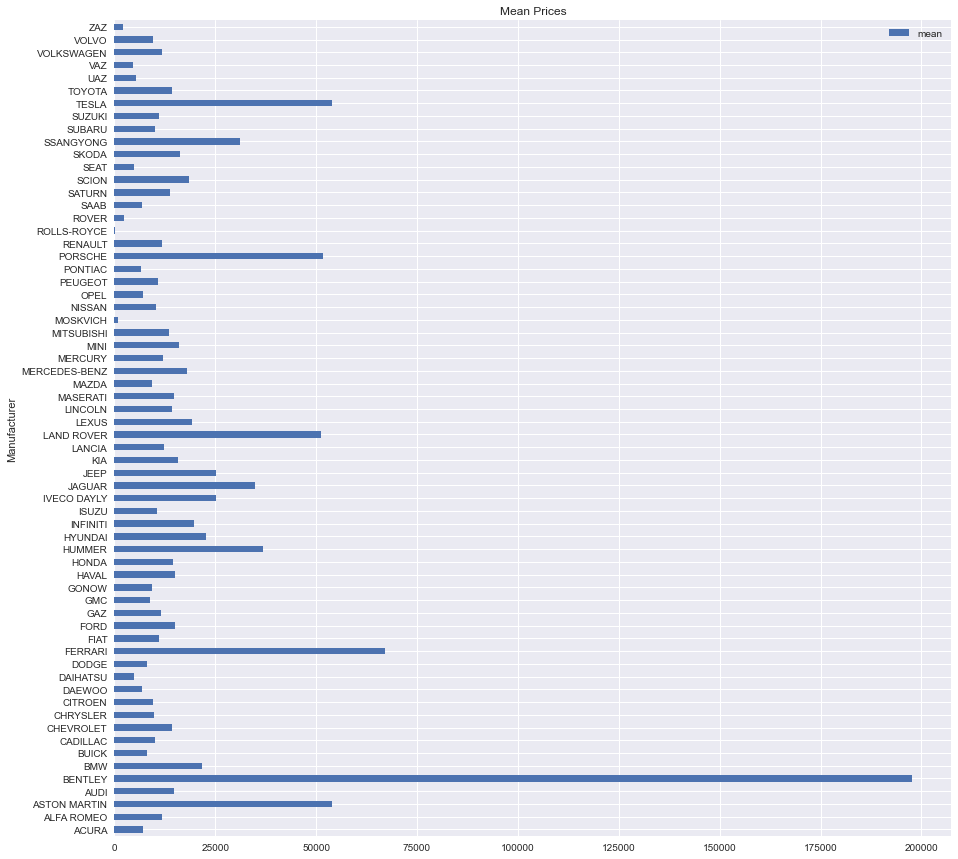

In [84]:
manufacturer.plot(kind = "barh", y = "mean", legend = True, title = "Mean Prices", figsize = (15,15)) # plot manufacturer & resize the plot

Notice the data is highly skewed, in order to reduce skewness I will use log transformation

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Manufacturer'>

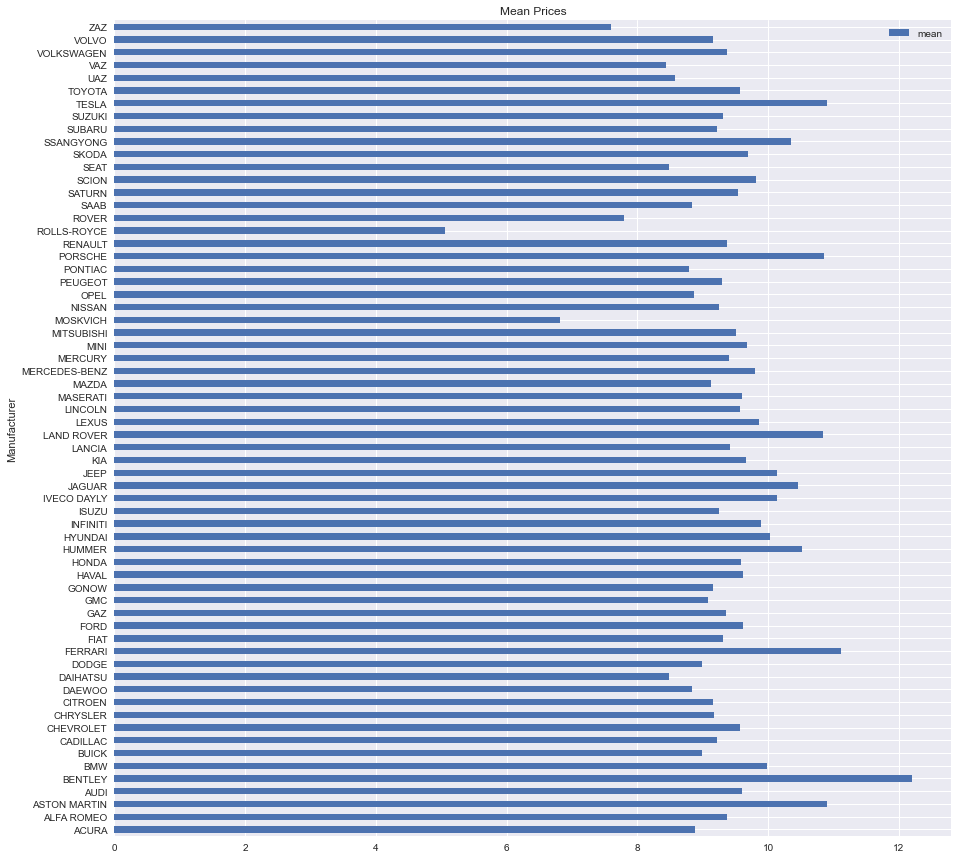

In [85]:
data_log1 = np.log(manufacturer) # log
data_log1.plot(kind = "barh", y = "mean", legend = True, title = "Mean Prices", figsize = (15,15)) # plot manufacturer & resize the plot

manufacturer after log transformation

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Model'>

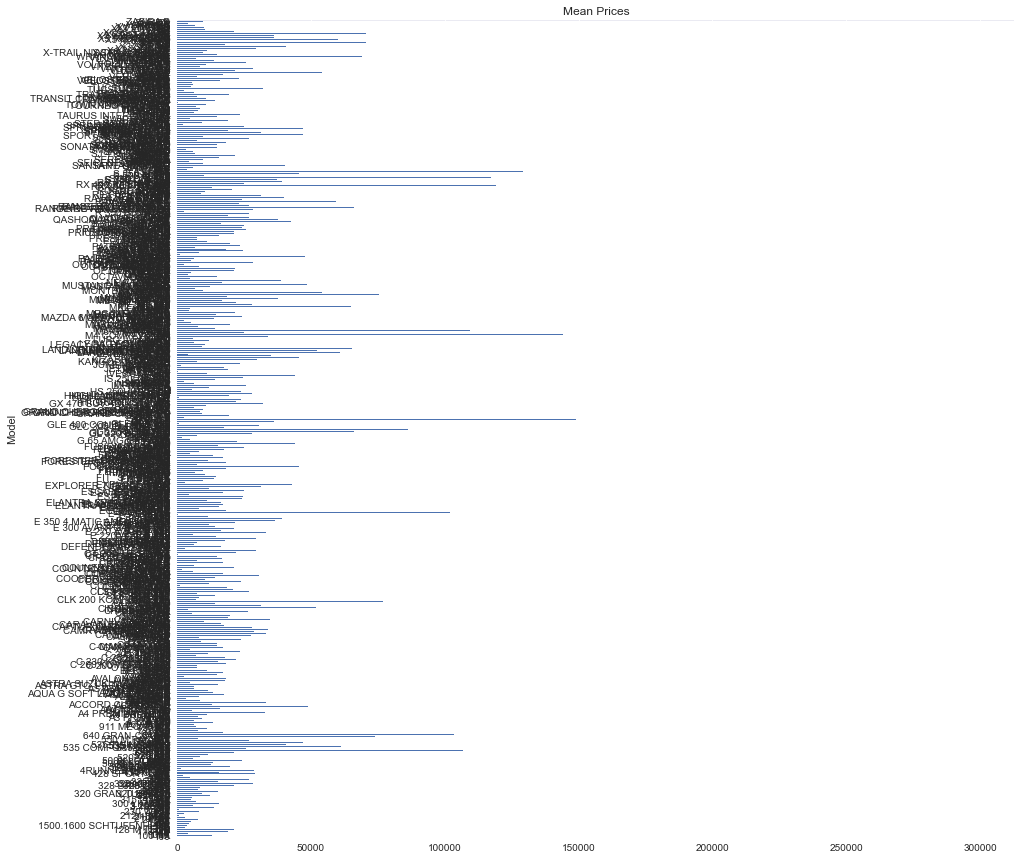

In [86]:
model.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices", figsize = (15,15)) # plot model & resize the plot

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Prod_year'>

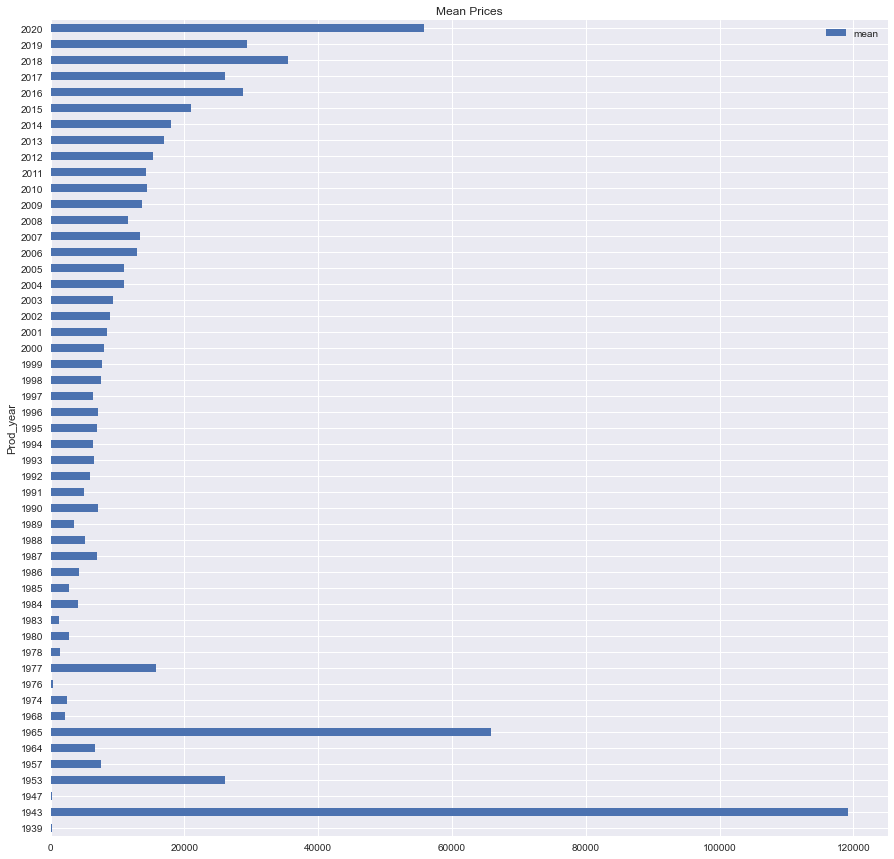

In [87]:
prod_year.plot(kind = "barh", y = "mean", legend = True,title = "Mean Prices", figsize = (15,15)) # plot prod_year & resize the plot

Notice the data is highly skewed, in order to reduce skewness I will use log transformation

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Prod_year'>

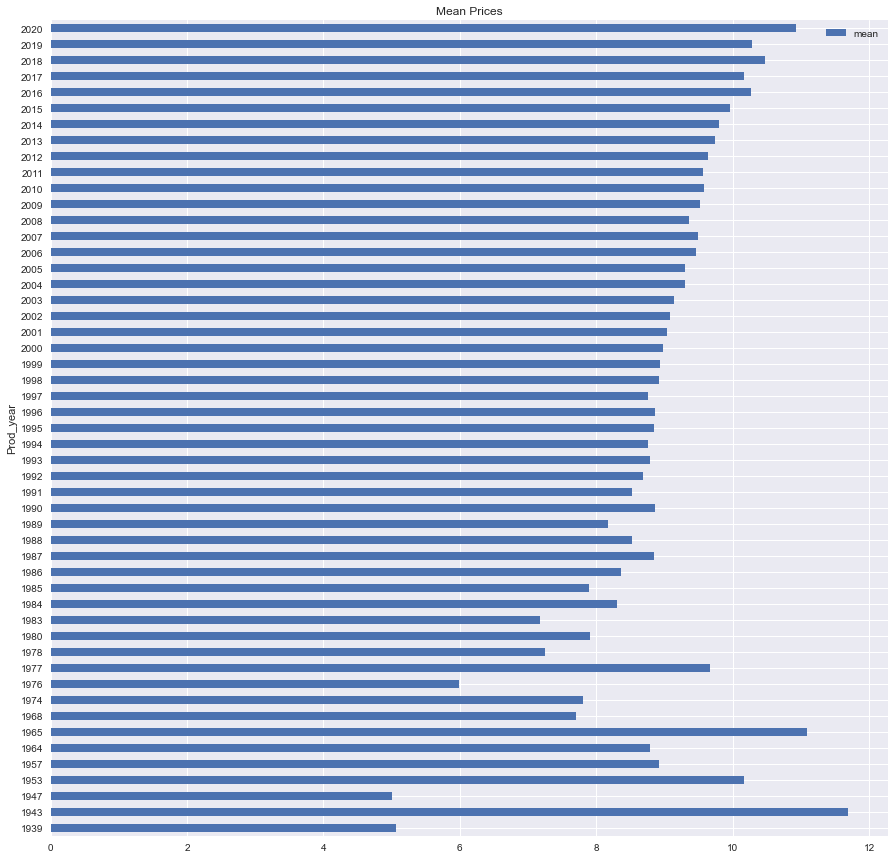

In [88]:
data_log2 = np.log(prod_year) # log
data_log2.plot(kind = "barh", y = "mean", legend = True,title = "Mean Prices", figsize = (15,15)) # plot prod_year & resize the plot

prod_year after log transformation

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Category'>

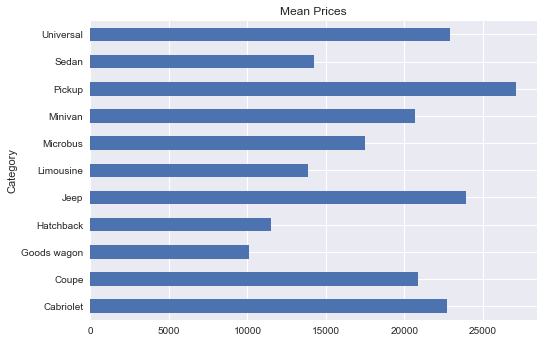

In [89]:
category.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices")  # plot category

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Leather_interior'>

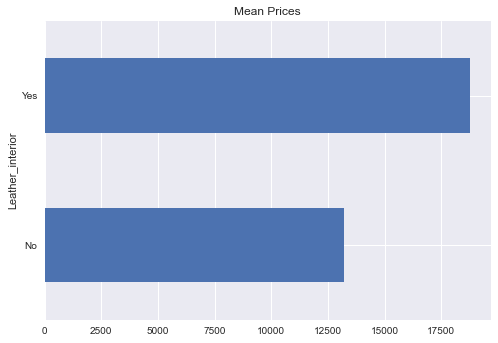

In [90]:
leather_interior.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices") # plot leather_interior

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Fuel_type'>

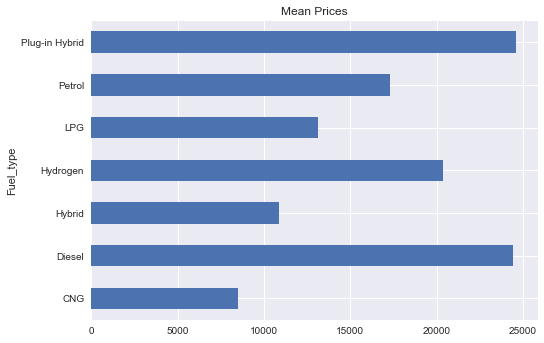

In [91]:
fuel_type.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices") # plot fuel_type

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Engine_volume'>

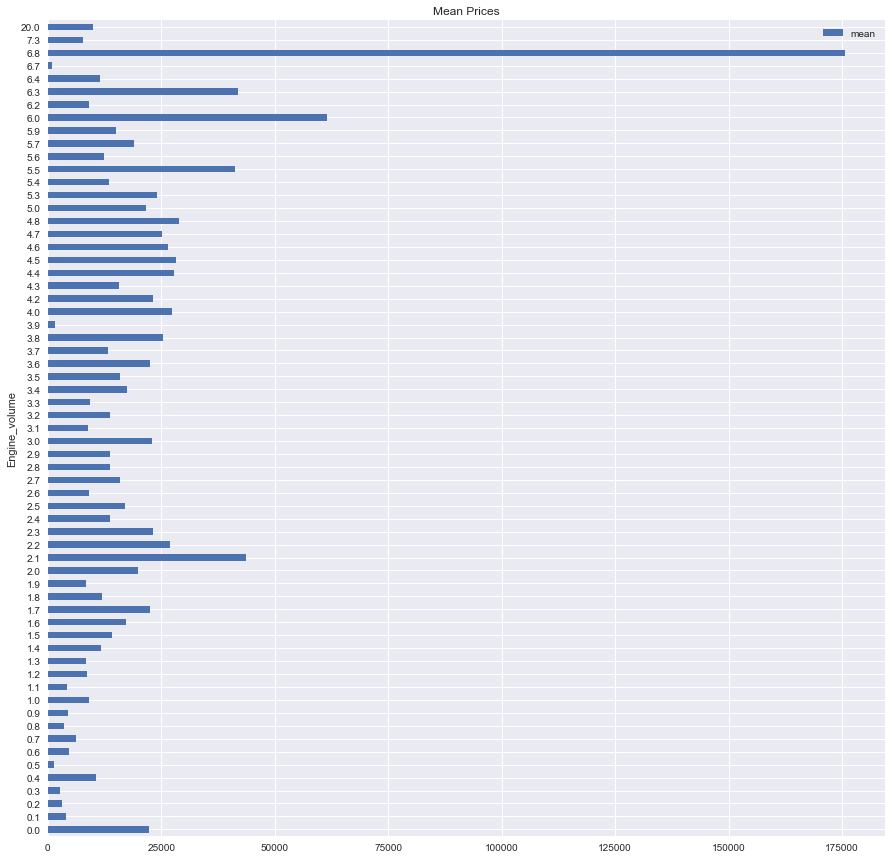

In [92]:
engine_volume.plot(kind = "barh", y = "mean", legend = True,title = "Mean Prices", figsize = (15,15)) # plot engine_volume & resize the plot

Notice the data is highly skewed, in order to reduce skewness I will use log transformation

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Engine_volume'>

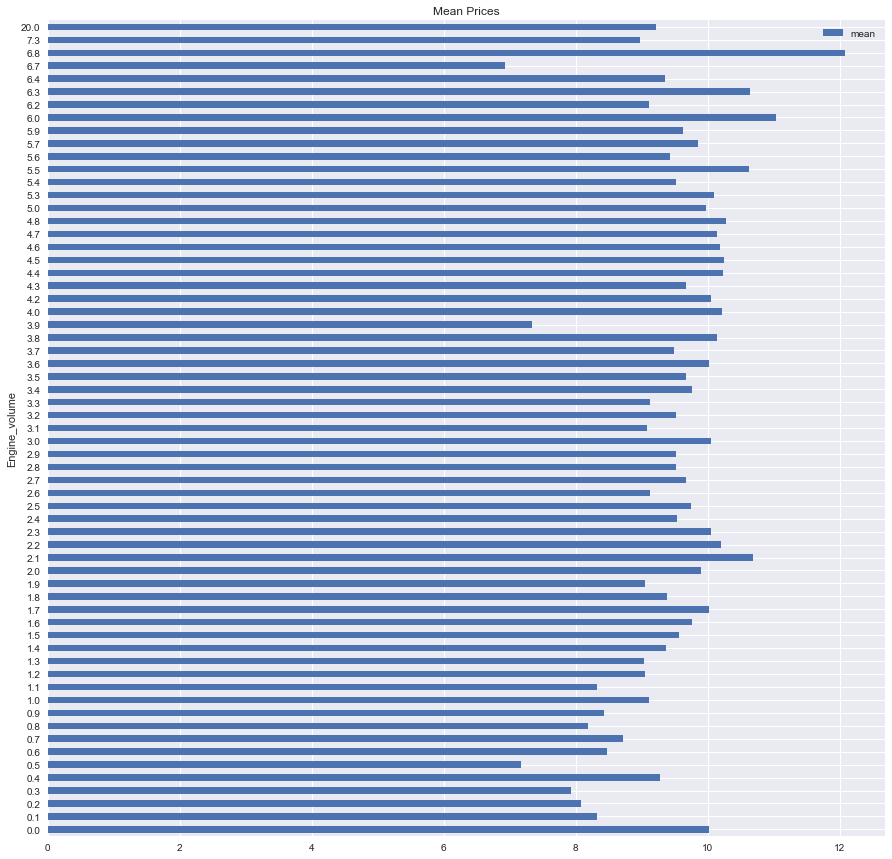

In [93]:
data_log3 = np.log(engine_volume) # log
data_log3.plot(kind = "barh", y = "mean", legend = True,title = "Mean Prices", figsize = (15,15)) # plot engine_volume & resize the plot

engine_volume after log transformation

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Turbo'>

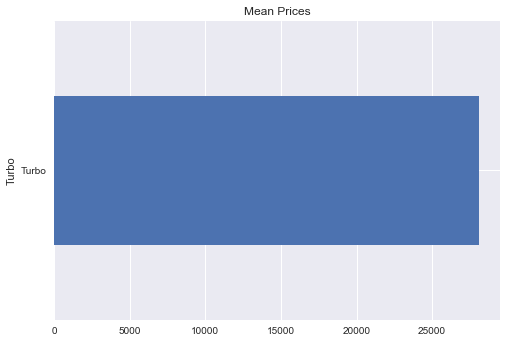

In [94]:
turbo.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices") # plot turbo

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Mileage'>

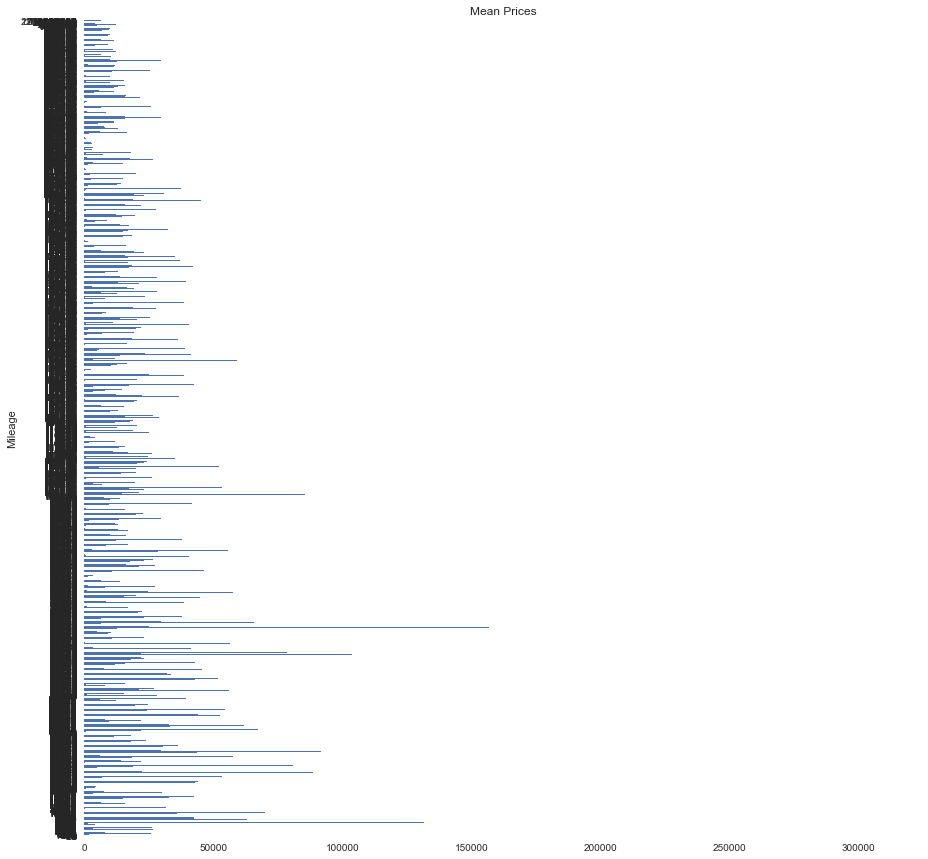

In [95]:
mileage.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices", figsize = (15,15)) # plot mileage & resize the plot

Notice the data is highly skewed, in order to reduce skewness I will use log transformation

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Mileage'>

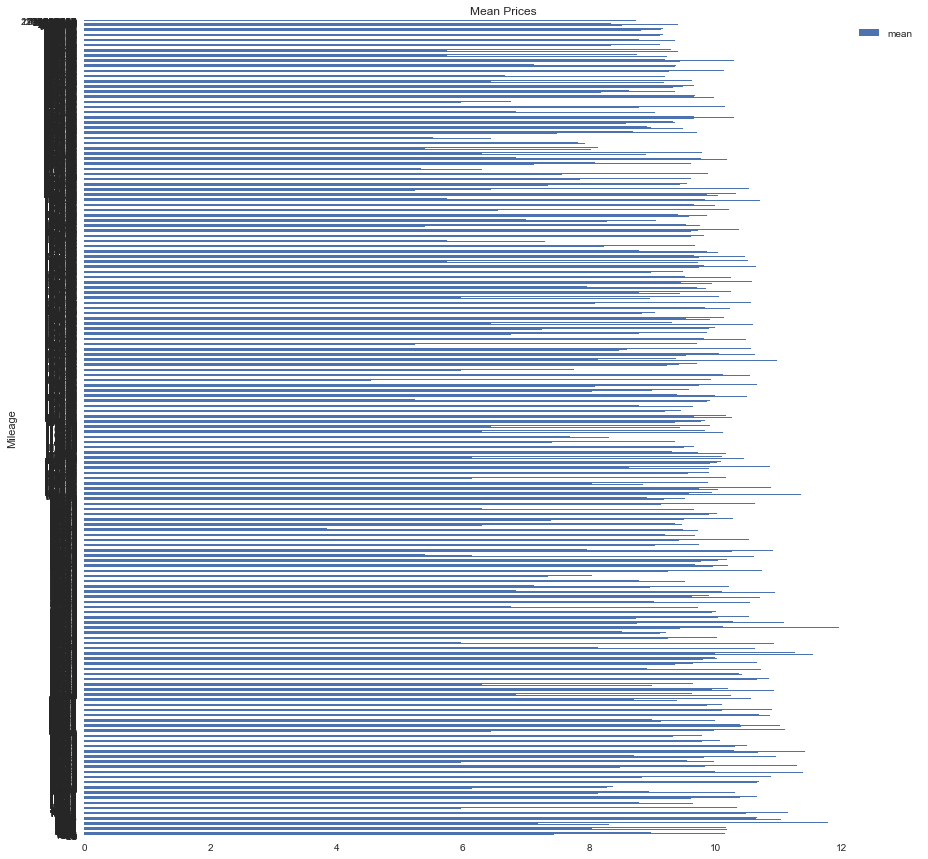

In [96]:
data_log4 = np.log(mileage) # log
data_log4.plot(kind = "barh", y = "mean", legend = True,title = "Mean Prices", figsize = (15,15)) # plot engine_volume & resize the plot

mileage after log transformation

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Cylinders'>

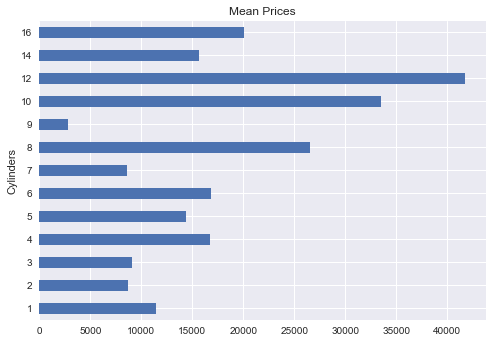

In [97]:
cylinders.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices") # plot cylinders 

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Gear_box_type'>

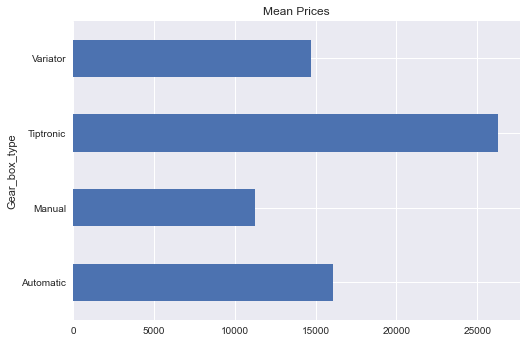

In [98]:
gear_box_type.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices") # plot gear_box_type

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Drive_wheels'>

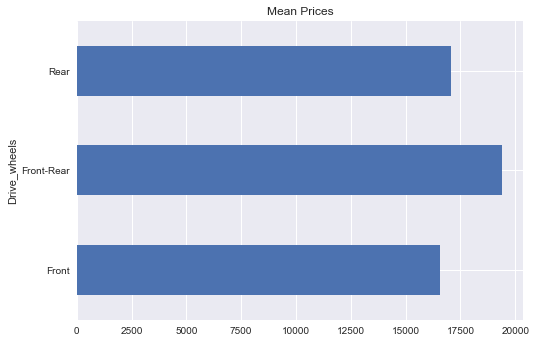

In [99]:
drive_wheels.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices") # plot drive_wheels

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Doors'>

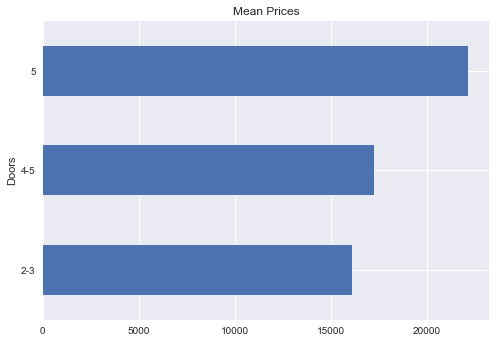

In [100]:
doors.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices") # plot doors 

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Wheel'>

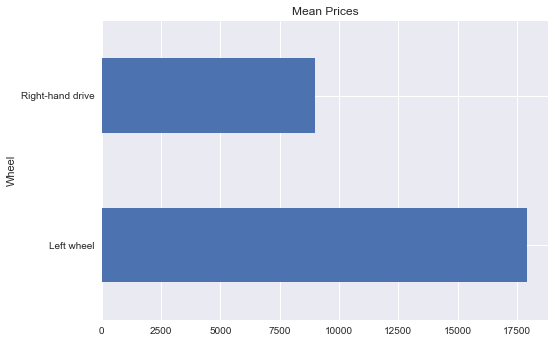

In [101]:
wheel.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices") # plot wheel 

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Color'>

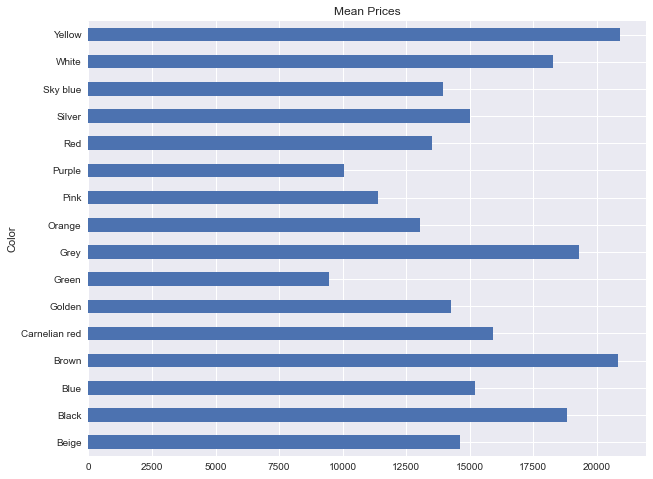

In [102]:
color.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices", figsize = (10,8)) # plot color & resize the plot

<AxesSubplot:title={'center':'Mean Prices'}, ylabel='Airbags'>

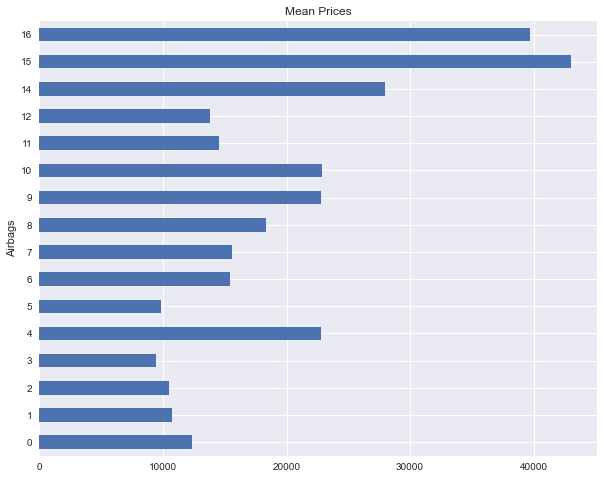

In [103]:
airbags.plot(kind = "barh", y = "mean", legend = False,title = "Mean Prices", figsize = (10,8)) # plot airbags & resize the plot

#### 5.2 heteroscedasticity (Breusch-Pegan Test)

Testing for Heteroskedasticity
$\newline$
Hypothesis:
$\newline$
* The null hypothesis (H0): Signifies that Homoscedasticity is present.
$\newline$
* The alternative hypothesis: (Ha): Signifies that the Homoscedasticity is not present (i.e. heteroscedasticity exists)
$\newline$
First you need to install the numNumPypy, pandas and statsmodels library using: pip3 install numpy pandas statsmodels

In [104]:
# fit regression model
fit = smf.ols("Price ~ Levy + Manufacturer + Model + Prod_year + Category + Leather_interior + Fuel_type + Engine_volume + Turbo + Mileage + Cylinders + Gear_box_type + Drive_wheels+ Doors + Wheel  +Color + Airbags", data= df).fit()

In [105]:
# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value'] 
# Get the test result
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
lzip(names, test_result)

[('Lagrange multiplier statistic', 715.284773129976),
 ('p-value', 1.0),
 ('f-value', 2.0415045099940903),
 ('f p-value', 5.556962926333127e-20)]

Output Interpretation:
$\newline$
Here, the Lagrange multiplier statistic for the test comes out to be equal to 715.284 and the corresponding p-value comes out to be equal to 1.0. Since the p-value is greater than 0.05 so we couldn’t reject the null hypothesis. Hence, We do not have enough proof to say that heteroscedasticity is present in the regression model.

### 6. Implementing Linear Regression with Categorical variable Using Sklearn

In [106]:
# Get Path
path = 'C:/Users/chris/Documents/School/Masters/zz_GIT/2022-msaai-500-final-project/data/sanitized/FilterData3.csv'

# Reading the dataset
df = pd.read_csv(path)
display(df)

,Unnamed: 0,ID,Price,Levy,MakeModel,Prod_year,Category,Leather_interior,Fuel_type,Mileage,Engine_volume,Cylinders,Gear_box_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,11219,20746880,157,0,0.046772,1939,Limousine,Yes,Petrol,126000,2.400000,4,Automatic,Rear,4-5,Left wheel,White,0
1,13225,23242980,200,0,0.141307,2017,Jeep,Yes,Petrol,95000,2.700000,4,Automatic,Front-Rear,5,Left wheel,Black,10
2,13572,24367759,85702,0,0.299423,2013,Microbus,Yes,Diesel,225000,3.861956,6,Manual,Rear,2-3,Left wheel,White,4
3,3643,24701923,130,0,0.058867,2006,Jeep,Yes,Petrol,90000,4.400000,8,Tiptronic,Front-Rear,4-5,Left wheel,Black,8
4,5509,24940334,25089,0,0.057150,1999,Limousine,Yes,Petrol,99000,5.400000,8,Automatic,Front-Rear,4-5,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19212,14885,45816647,15053,0,0.035492,2010,Hatchback,No,Petrol,83000,2.000000,4,Automatic,Front,5,Left wheel,Golden,6
19213,710,45816648,24148,810,0.075149,2016,Hatchback,No,Petrol,10200,1.800000,4,Automatic,Front,4-5,Left wheel,White,10
19214,2168,45816650,20698,697,0.075149,2015,Hatchback,No,Petrol,78000,1.800000,4,Manual,Front,4-5,Left wheel,Silver,10
19215,12245,45816651,10976,0,0.025909,2007,Sedan,Yes,Petrol,224823,3.510869,4,Tiptronic,Front-Rear,4-5,Left wheel,White,0


In [107]:
df.shape
df.describe()

,Unnamed: 0,ID,Price,Levy,MakeModel,Prod_year,Mileage,Engine_volume,Cylinders,Airbags
count,19217.000000,1.921700e+04,19217.000000,19217.000000,19217.000000,19217.000000,1.921700e+04,19217.000000,19217.000000,19217.000000
mean,9618.009887,4.557636e+07,17128.202061,632.751782,0.057377,2010.913670,1.421973e+06,2.479367,4.582453,6.583286
std,5553.556104,9.370593e+05,18279.641947,567.652166,0.040567,5.666155,4.588801e+07,1.068608,1.198624,4.319785
min,0.000000,2.074688e+07,6.000000,0.000000,0.000000,1939.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,4808.000000,4.569837e+07,5331.000000,0.000000,0.035710,2009.000000,7.019400e+04,1.800000,4.000000,4.000000
50%,9618.000000,4.577234e+07,13172.000000,642.000000,0.047439,2012.000000,1.260210e+05,2.000000,4.000000,6.000000
75%,14426.000000,4.580204e+07,22110.000000,917.000000,0.066120,2015.000000,1.888880e+05,3.000000,4.000000,12.000000
max,19236.000000,4.581665e+07,308906.000000,11714.000000,0.999886,2020.000000,2.147484e+09,20.000000,16.000000,16.000000


In [108]:
df.dtypes

Unnamed: 0            int64
ID                    int64
Price                 int64
Levy                  int64
MakeModel           float64
Prod_year             int64
Category             object
Leather_interior     object
Fuel_type            object
Mileage               int64
Engine_volume       float64
Cylinders             int64
Gear_box_type        object
Drive_wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

from the above output we can see if the dataset is following normal distribution

In [109]:
# independent variables
X = df[['Levy','MakeModel','Prod_year','Category','Leather_interior','Fuel_type','Mileage','Engine_volume','Cylinders','Gear_box_type','Drive_wheels','Doors','Wheel','Color','Airbags']]

In [110]:
X = pd.get_dummies(data=X, drop_first=True) # creating a dummy variable
X.head()

,Levy,MakeModel,Prod_year,Mileage,Engine_volume,Cylinders,Airbags,Category_Coupe,Category_Goods wagon,Category_Hatchback,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,0,0.046772,1939,126000,2.400000,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.141307,2017,95000,2.700000,4,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.299423,2013,225000,3.861956,6,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0.058867,2006,90000,4.400000,8,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.057150,1999,99000,5.400000,8,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Regression results are easier to interpret when dummy variables are limited to two specidic values, 1 or 0. 1 represents the presence of qualitative attribute, and 0 represents the absence

In [111]:
# dependent variable
Y = df['Price']

In [112]:
# creating a train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13451, 47)
(5766, 47)
(13451,)
(5766,)


In [113]:
# importing linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [114]:
# print the intercept
print(model.intercept_)

-1889774.043681832


In [115]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Levy,-2.504613e+00
MakeModel,2.465659e+05
Prod_year,9.467128e+02
Mileage,6.477146e-07
Engine_volume,2.470109e+03
Cylinders,-4.618217e+02
Airbags,-3.853729e+02
Category_Coupe,-5.478890e+03
Category_Goods wagon,-1.020015e+04
Category_Hatchback,-6.594203e+03


Positive sign indicates that as the predictor variable increases, the target variable also increases.
$\newline$
Negative sign indicates that as the predictor variable increases, the target variable dectreases

In [116]:
# predicted variable
predictions = model.predict(X_test)
predictions

array([ 8241.53657265, 26390.77912694, 30672.4740071 , ...,
        5381.73717041, 25613.79114204, 43738.27012917])

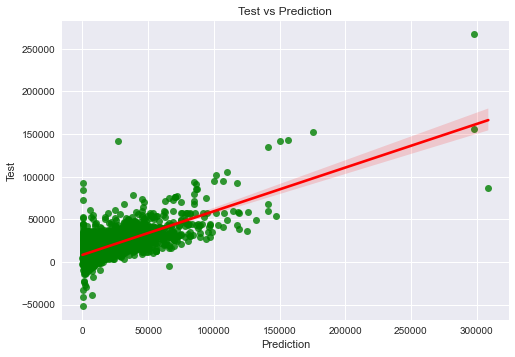

In [117]:
plt.title("Test vs Prediction")
ax = sns.regplot(y_test,predictions,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.xlabel("Prediction")
plt.ylabel("Test")
plt.show()

The graph above shows our model is predicting good results.

In [118]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     308.3
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:40:16   Log-Likelihood:            -1.4611e+05
No. Observations:               13451   AIC:                         2.923e+05
Df Residuals:                   13403   BIC:                         2.927e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

We Use adjusted R-squared to compare the goodness-of-fit for regression models that contain different numbers of independent variables.
out R-squared: 0.519 and Adj. R-squared: 0.518, therefor our R-squared is a moderate fit.
$\newline$
The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.